# Исследование сервиса Яндекс.Недвижимость

## Содержание
1. [Описание проекта](#project_desctryption)

2. [Обзор данных](#data_overview)
3. [Предобработка данных](#data_prepare)<br>
    3.1 [Поиск пропусков:](#na_search)<br>
    > [airports_nearest](#na_airports)<br>
    [balcony](#balcony_na)<br>
    [ceiling_height](#ceiling_na)<br>
    [city_centers_nearest](#city_centers_na)<br>
    [days_exposition](#days_exposition_na)<br>
    [floors_total](#floors_total_na)<br>
    [is_apartment](#is_apartment_na)<br>
    [kitchen_area](#kitchen_area_na)<br>
    [living_area](#living_area_na)<br>
    [locality_name](#locality_name_na)<br>
    ['parks' & 'ponds'](#parks_ponds_na)<br>
    
    3.2 [Приведение типов данных, работа с аномалиями](#art_fix)<br>
    3.3 [Поиск дубликатов](#duobl_find)<br>
4. [Добавление новых данных](#new_columns)<br>
5. [Исследовательский анализ данных](#analis)<br>
    5.1 [Площадь, цена, число комнат, высота потолков](#sience_1)<br>
    5.2 [Время продажи квартиры](#sience_2)<br>
    5.3 [Влияние различных факторов на стоимость квартиры](#sience_3)<br>
    5.4 [10 населенных пунктов с наибольшим числом объявлений](#sience_4)<br>
    5.5 [Центр Санкт-Петербурга](#sience_5)<br>
    5.6 [Анализ квартир в центре](#sience_6)<br>
6. [Общий вывод](#resume)

## 1. Описание проекта <a name="project_desctryption"></a>

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. <br>
Нужно научиться определять рыночную стоимость объектов недвижимости. <br>
Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.<br>

По каждой квартире на продажу доступны два вида данных:
* первые вписаны пользователем;
* вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

## 2. Обзор данных <a name="data_overview"></a>

Прочитаем файл с данными и сохраним его в переменную `df`

In [1]:
import pandas as pd        # импортируем библиотеку pandas
import seaborn as sps      # импортируем библиотеку seaborn
from matplotlib import pyplot as plt # импортируем библиотеку для построения графиков
import numpy as np # импортируем библиотеку numpy
from datetime import datetime # импортируем библиотеку для работы с типами datetime
import os

In [2]:
pth1 = '/datasets/real_estate_data.csv'
pth2 = 'real_estate_data.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1, nrows=10)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2, nrows=10)
else:
    print('Не удается прочитать файл.')

#try:
#    df = pd.read_csv('/datasets/real_estate_data.csv', nrows=10) # чтение файла при выполнении задания в окружении Яндекса - 10 строк для проверки
#except:
#    df = pd.read_csv('real_estate_data.csv', nrows=10) # чтение файла в локальном окружении на JupyterLab Server - 10 строк для проверки

Ознакомимся с данными, прочитав первые 5 строк датафрейма:

In [3]:
df.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


В качестве разделителя у нас `\`, а не запятая. Прочитаем еще раз csv-файл с учетом нового разделителя:

In [4]:
if os.path.exists(pth1):
    df = pd.read_csv(pth1, sep='\t') # чтение файла в окружении Яндекса с учетом разделителя \
elif os.path.exists(pth2):
    df = pd.read_csv(pth2, sep='\t')  # чтение файла в локальном окружении с учетом разделителя \ 
else:
    print('Не удается прочитать файл.')


#try:
#    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # чтение файла в окружении Яндекса с учетом разделителя \
#except:
#    df = pd.read_csv('real_estate_data.csv', sep='\t') # чтение файла в локальном окружении с учетом разделителя \ 

pd.options.display.max_columns = 40 # столбцов много, поэтому устанавливаем отображение всех, с запасом
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Теперь лучше. Посмотрим на общие данные о таблице:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

У нас 22 столбца с типами данных `int64`, `float64`, `object` и `bool`. В некоторых столбцах присутствуют нулевые значения.

Посмотрим на описание данных, полученное от заказчика:

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м);
* `balcony` — число балконов;
* `ceiling_height` — высота потолков (м);
* `cityCenters_nearest` — расстояние до центра города (м);
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия);
* `first_day_exposition` — дата публикации;
* `floor` — этаж;
* `floors_total` — всего этажей в доме;
* `is_apartment` — апартаменты (булев тип);
* `kitchen_area` — площадь кухни в квадратных метрах (м²);
* `last_price` — цена на момент снятия с публикации;
* `living_area` — жилая площадь в квадратных метрах (м²);
* `locality_name` — название населённого пункта;
* `open_plan` — свободная планировка (булев тип);
* `parks_around3000` — число парков в радиусе 3 км;
* `parks_nearest` — расстояние до ближайшего парка (м);
* `ponds_around3000` — число водоёмов в радиусе 3 км;
* `ponds_nearest` — расстояние до ближайшего водоёма (м);
* `rooms` — число комнат;
* `studio` — квартира-студия (булев тип);
* `total_area` — площадь квартиры в квадратных метрах (м²);
* `total_images` — число фотографий квартиры в объявлении.


Пояснение: апартаменты — это нежилые помещения, которые не относятся к жилому фонду, но имеют необходимые условия для проживания.

Проверим, есть ли нарушения в стилях заголовков:

In [6]:
df.columns # выводим список столбцов

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Приведем следующие столбцы к единому стилю:
* `cityCenters_nearest` -> `city_centers_nearest`;
* `parks_around3000` -> `parks_around_3000`;
* `ponds_around3000` -> `ponds_around_3000`.

In [7]:
df.rename(columns={'cityCenters_nearest': 'city_centers_nearest',
                  'parks_around3000': 'parks_around_3000',
                  'ponds_around3000': 'ponds_around_3000'
                  }
          , inplace=True
         ) # Переименуем столбцы df и применим изменения к текущему датафрейму
df = df.reindex(sorted(df.columns), axis=1) # отсортируем датафрейм по именам столбцов в алфавитном порядке для удобства работы со столбцами
df.columns # выведем список столбцов, чтобы проверить результат

Index(['airports_nearest', 'balcony', 'ceiling_height', 'city_centers_nearest',
       'days_exposition', 'first_day_exposition', 'floor', 'floors_total',
       'is_apartment', 'kitchen_area', 'last_price', 'living_area',
       'locality_name', 'open_plan', 'parks_around_3000', 'parks_nearest',
       'ponds_around_3000', 'ponds_nearest', 'rooms', 'studio', 'total_area',
       'total_images'],
      dtype='object')

**Выводы:** <br>
В каждой строке таблицы содержатся данные объявления о продаже недвижимости. Часть данных вписана пользователем (число балконов, высота потолков, этаж, этажность дома, площадь квартиры и кухни, жилая площадь, цена, тип планировки, число комнат), часть - собрана автоматизированными средствами Яндекс Недвижимости (расстояние до ближайшего аэропорта, расстояние до центра города, сколько дней было размещено объявление, дата публикации, название населенного пункта, число парков и водоемов в радиусе 3км, расстояние до ближайшего водоема, число фотографий в объявлении).

Таблица содержит категориальные данные: апартаменты, свободная планировка, название населенного пункта.

## 3. Предобработка данных <a name="data_prepare"></a>

### 3.1 Поиск пропусков <a name="na_search"></a>
Найдем пропущенные значения в датафрейме:

In [8]:
# напишем функцию для вывода пропущенных значений в отдельном столбце
def df_na(series):
    print(f'{series.name} \t {series.isna().sum()} \t {round(series.isna().sum() / len(df) * 100)}%') 
    
df.isna().sum()

airports_nearest         5542
balcony                 11519
ceiling_height           9195
city_centers_nearest     5519
days_exposition          3181
first_day_exposition        0
floor                       0
floors_total               86
is_apartment            20924
kitchen_area             2278
last_price                  0
living_area              1903
locality_name              49
open_plan                   0
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
rooms                       0
studio                      0
total_area                  0
total_images                0
dtype: int64

Пропуски содержатся в большинстве столбцов. Начнем по порядку.

Выберем строки, где значение `airports_nearest` пропущено и выведем 5 случайных строк:<a name="na_airports"></a>

In [9]:
df.query('airports_nearest.isna()', engine='python').sample(5)

,airports_nearest,balcony,ceiling_height,city_centers_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,last_price,living_area,locality_name,open_plan,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,rooms,studio,total_area,total_images
22148,NaN,NaN,NaN,NaN,477.0,2017-09-27T00:00:00,1,4.0,NaN,9.8,4658410.0,32.7,деревня Мистолово,False,NaN,NaN,NaN,NaN,2,False,57.70,1
18558,NaN,2.0,2.55,NaN,139.0,2017-10-20T00:00:00,8,10.0,NaN,10.6,4600000.0,49.6,поселок городского типа имени Свердлова,False,NaN,NaN,NaN,NaN,3,False,80.00,13
15216,NaN,0.0,NaN,NaN,87.0,2016-05-25T00:00:00,1,5.0,False,9.0,3250000.0,50.0,Кингисепп,False,NaN,NaN,NaN,NaN,4,False,80.00,5
21952,NaN,2.0,2.75,NaN,360.0,2017-04-07T00:00:00,7,25.0,False,10.0,3450000.0,16.3,посёлок Мурино,False,NaN,NaN,NaN,NaN,1,False,35.56,13
11077,NaN,NaN,2.80,NaN,NaN,2018-10-29T00:00:00,9,9.0,False,15.8,4776000.0,43.2,Всеволожск,False,NaN,NaN,NaN,NaN,2,False,79.60,1


В этих строках много пустых значений. Обратим внимание на столбец `locality_name`. Возможно, значения пропущены из-за того, что объекты недвижимости находятся не в Санкт-Петербурге, а в области, где до ближайшего аэропорта очень далеко.<br>
Проверим эту гипотезу, выведем все уникальные значения столбца `locality_name` там, где расстояние до ближайшего аэорпорта пропущено:

In [10]:
# вывод уникальных значений населенных пунсктов, где расстояние до аэропорта пропущено
df.query('airports_nearest.isna()', engine='python')['locality_name'].unique() 

array(['городской посёлок Янино-1', 'посёлок Мурино', 'Сертолово',
       'деревня Кудрово', 'Коммунар',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кировск',
       'деревня Новое Девяткино', 'Санкт-Петербург',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'посёлок Новый Свет', 'Сланцы', 'село Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Сосновый Бор',
       'поселок Новый Свет', 'деревня Оржицы', 'деревня Кальтино',
 

Среди населенных пунктов есть и Санкт-Петербург, и другие места Ленинградской области.<br>
Пустых значений 5542, что довольно много, постараемся заполнить эти данные релевантными значениями.<br>
Очевидно, что расстояние до аэропорта влияет на стоимость аренды недвижимости. Хорошо, когда до аэропорта быстро и легко добраться, но плохо, если жилье находится слишком близко к нему - большое количество вредных выбросов и акустический дискомфорт. Чем ближе к аэропорту находится объект недвижимости, тем ниже его привлекательность для клиента, тем ниже должна быть стоимость при продаже.<br>
Обратимся к официальным документам в области строительства и здоровья граждан:
* СанПиН 2.1.1.1002-00;
* Федеральный закон "О санитарно-эпидемиологическом благополучии населения" N 52-ФЗ от 30 марта 1999 г.;
* ГН 2.1.6.133-03 "Ориентировочные безопасные уровни воздействия (ОБУВ) загрязняющих веществ в атмосферном воздухе";
* ГН 2.1.6.1338-03 "Предельно допустимые концентрации (ПДК) загрязняющих веществ в атмосферном воздухе населенных мест".

Согласно этим документам, безопасным с точки зрения здоровья граждан считается проживание не ближе 5км от аэропорта.<br>
Для Ленинградской области не попадают в нашу категорию безопасных мест для проживания посёлок Шушары (рядом аэропорт Пулково), город Пушкин и Павловск (рядом аэродром Пушкин), поскольку находятся в радиусе 5км от взлетно-посадочных полос авиатранспорта.<br>

Посмотрим, есть ли среди значений с пропущенным расстоянием до аэропорта населенные пункты Шушары, Пушкин и Павловск:

In [11]:
df.query('airports_nearest.isna() and ["посёлок Шушары", "Пушкин", "Павловск"] in locality_name', engine='python')

,airports_nearest,balcony,ceiling_height,city_centers_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,last_price,living_area,locality_name,open_plan,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,rooms,studio,total_area,total_images
608,NaN,NaN,NaN,NaN,29.0,2019-02-20T00:00:00,7,10.0,NaN,NaN,1850000.0,NaN,посёлок Шушары,False,NaN,NaN,NaN,NaN,0,True,25.0,2
6610,NaN,1.0,2.75,NaN,85.0,2018-07-05T00:00:00,11,16.0,NaN,14.0,5300000.0,34.0,посёлок Шушары,False,NaN,NaN,NaN,NaN,2,False,61.0,19
7720,NaN,NaN,NaN,NaN,56.0,2018-07-25T00:00:00,22,24.0,NaN,NaN,2600000.0,16.0,посёлок Шушары,False,NaN,NaN,NaN,NaN,1,False,24.0,9
10058,NaN,NaN,2.65,NaN,23.0,2018-09-10T00:00:00,21,NaN,NaN,3.5,3350000.0,17.0,посёлок Шушары,False,NaN,NaN,NaN,NaN,1,False,25.0,9


Таких строк всего четыре, все - 'посёлок Шушары'. Взглянем на населенные пункты, по которым медианными данными `airports_nearest` мы можем заполнить отсутствующие значения. Для этого пересечём два списка населенных пунктов: 
1. Список, где данные о расстоянии до аэропорта пропущены;
2. Список, где данные о расстоянии до аэропорта имеются.

In [12]:
set(
    df.query('airports_nearest.isna()', engine='python')['locality_name']
) \
    .intersection(
    df.query('~airports_nearest.isna()', engine='python')['locality_name']
) # пересекаем два списка locality_name - первый содержит NaN значения airports_nearest, второй не содержит

{nan,
 'Колпино',
 'Красное Село',
 'Кронштадт',
 'Ломоносов',
 'Санкт-Петербург',
 'поселок Мурино',
 'посёлок Шушары',
 'посёлок Щеглово'}

Есть Шушары, а также другие населенные пункты. Заменим медианными значениями `airports_nearest` по указанным населенным пунктам все пустые значения:

In [13]:
# заполняем пустые значения столбца с расстоянием до аэропорта медианным значением расстояния до аэропорта 
# с группировкой по населенному пункту
df['airports_nearest'].fillna(df.groupby('locality_name')['airports_nearest'].transform('median'), inplace=True) 

In [14]:
df['airports_nearest'].isna().sum() # подсчитаем, сколько пустых значений оастлось

5394

In [15]:
df_na(df['airports_nearest']) # считаем процент от общего количества данных

airports_nearest 	 5394 	 23%


Часть незаполненных данных мы заполнили медианными значеничями по соответствующим населенным пунктам. Для остальных 5394 пропущенных значений (23% от общего числа записей) отсутствуют медианные значения для тех же населенных пунктов.

Посмотрим на распределение значений `airports_nearest`:

In [16]:
df['airports_nearest'].describe() # посмотрим все ключевые "метрики" столбца с расстоянием до аэропорта

count    18305.000000
mean     28864.048184
std      12673.634680
min          0.000000
25%      18641.000000
50%      26757.500000
75%      37313.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Text(0.5, 1.0, 'Распределение расстояния до аэропортов')

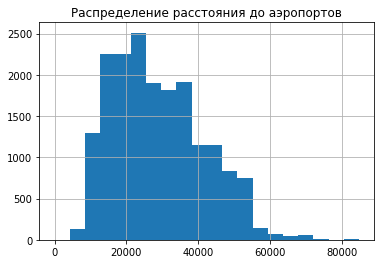

In [17]:
df.hist('airports_nearest', bins=20) # построим гистограмму распределения, число корзин 20
plt.title('Распределение расстояния до аэропортов') 

Распределение вполне равномерное, с небольшим хвостов в районе 80км от аэропорта. <br> Посмотрим на уникальные значения населенных пунктов `locality_name`, в которых данные о расстоянии до аэропорта `airports_nearest` пусты:

In [18]:
df.query('~airports_nearest.isna()', engine='python')['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Парголово',
       'Ломоносов', 'Петергоф', 'Пушкин', 'Колпино', 'поселок Мурино',
       'Кронштадт', 'посёлок Металлострой', 'Павловск', 'Сестрорецк',
       'Красное Село', 'посёлок Понтонный', 'Зеленогорск',
       'посёлок Молодёжное', 'посёлок Стрельна',
       'посёлок Александровская', nan, 'посёлок Песочный',
       'посёлок Щеглово', 'посёлок Петро-Славянка', 'посёлок Репино',
       'посёлок Сапёрный', 'поселок Лисий Нос', 'посёлок Левашово',
       'посёлок Белоостров', 'посёлок Лисий Нос', 'посёлок Усть-Ижора'],
      dtype=object)

Можно сделать *промежуточный вывод* о том, что данные о расстоянии до аэропорта заполнены только у 77% объявлений. В основном это объявления о продаже недвижимости в Санкт-Петербурге и некоторых населенных пунктах.<br>
Для остальных 23% объявлений данные о близости к аэропорту не заполнены. В основном это объявления о продаже недвижимости в различных поселках и деревнях Ленинградской области. Очевидно, что в таких населенных пунктах расстояние до аэропорта не имеет значения при продаже недвижимости - цена от этого никак не повлияет.<br>
Заполнять их медианным значением (26757.5м) не имеет смысла, поскольку Ленинградская область имеет размеры 320х500 км и данные о расстоянии будут сильно искажены. Удалять их тоже нельзя - большой процент таких записей в датасете.<br>
Оставим пустые данные в столбце `airports_nearest` без изменения - это будет говорить о том, что пустые значения в данных о расстоянии до аэропорта не имеют значения при продаже такой недвижимости - самые критичные населенные пункты с точки зрения здоровья граждан мы обработали, остальные пустые поля - недвижимость в деревнях и сёлах, где данный параметр не играет роли.

Перейдем к отсутствию балконов - столбцу `balcony`:<a name="balcony_na"></a>

In [19]:
df['balcony'].describe() # посмотрим основные показатели столбца `balcony`

count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

In [20]:
df['balcony'].unique() # выведем все уникальные значения столбца

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Присутствуют целые значения, но с типом float.<br>
Отсутствующие значения скорее всего означают, что балкона вообще нет. 

Проверим эту гипотезу, взглянем на 10 случайных строки, где количество балконов не заполнено.

In [21]:
df.query('balcony.isna()', engine='python').sample(10)

,airports_nearest,balcony,ceiling_height,city_centers_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,last_price,living_area,locality_name,open_plan,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,rooms,studio,total_area,total_images
3460,23989.0,NaN,2.55,29775.0,NaN,2015-05-09T00:00:00,5,5.0,NaN,5.00,3200000.0,32.0,Колпино,False,0.0,NaN,1.0,864.0,2,False,45.4,13
17501,49058.0,NaN,NaN,14883.0,NaN,2019-04-09T00:00:00,24,26.0,NaN,11.40,5040000.0,16.0,Санкт-Петербург,False,1.0,265.0,1.0,572.0,1,False,30.7,4
11535,10534.0,NaN,2.80,12437.0,193.0,2018-02-09T00:00:00,11,19.0,NaN,10.80,4850000.0,20.0,Санкт-Петербург,False,1.0,284.0,1.0,653.0,1,False,42.3,4
21078,15109.0,NaN,2.50,7990.0,35.0,2018-10-14T00:00:00,2,5.0,NaN,15.00,4100000.0,18.0,Санкт-Петербург,False,1.0,455.0,0.0,NaN,1,False,36.0,12
22812,43982.0,NaN,NaN,13562.0,60.0,2017-12-14T00:00:00,3,24.0,NaN,NaN,5950000.0,NaN,Санкт-Петербург,False,1.0,549.0,0.0,NaN,1,False,42.1,15
7730,24179.0,NaN,NaN,29965.0,18.0,2018-11-29T00:00:00,1,5.0,NaN,5.30,2100000.0,17.3,Колпино,False,1.0,652.0,0.0,NaN,1,False,27.6,1
18168,33700.0,NaN,2.70,12430.0,60.0,2018-10-14T00:00:00,7,12.0,NaN,8.50,4550000.0,20.1,Санкт-Петербург,False,0.0,NaN,0.0,NaN,1,False,40.0,15
19975,NaN,NaN,NaN,NaN,342.0,2017-06-17T00:00:00,2,20.0,NaN,12.83,3394152.0,17.3,деревня Кудрово,False,NaN,NaN,NaN,NaN,1,False,40.8,9
4889,NaN,NaN,NaN,NaN,1314.0,2014-12-10T00:00:00,4,9.0,NaN,9.00,3300000.0,43.1,Шлиссельбург,False,NaN,NaN,NaN,NaN,3,False,71.7,8
15853,39751.0,NaN,3.20,7023.0,1171.0,2015-10-30T00:00:00,2,6.0,NaN,46.00,17990000.0,52.0,Санкт-Петербург,False,2.0,400.0,2.0,573.0,4,False,143.7,19


Не заполнены значения `balcony` у недвижимости, которая не является апартаментами, без свободной планировки. Других общих критерий не видно. <br>
Посмотрим на распределение числа балконов:

Text(0.5, 1.0, 'Балконы')

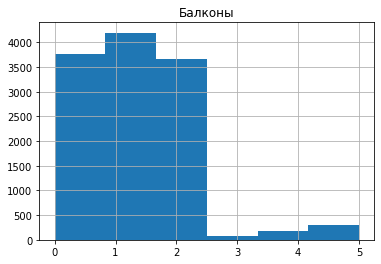

In [22]:
df.hist('balcony', bins=6) # строим гистрограмму распределения по количеству балконов
plt.title('Балконы') 

Действительно, мало жилой недвижимости с количеством балконов более 2. <br>
Скорее всего, пропущенные значения в `balcony` - неслучайны, означают отсутствие балконов.<br>

Заполним пустые значения в количестве балконов нулями и сразу приведем тип столбца `balcony` к типу integer:

In [23]:
df['balcony'] = df['balcony'].fillna(0).astype(int) # заполняем пропуски нулями и приводим тип данных столбца к int

Перейдем к столбцу c данными о высоте потолков - `ceiling_height`:<a name="ceiling_na"></a>

In [24]:
df['ceiling_height'].describe() # выведем основные метрики ceiling_height

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Есть потолки в 1 метр, есть в 100 метров, а есть и пустые значения. Медианное значение 2.65 м. Но при работе с аномалиями по этому столбцу медиана может измениться. Лучше исправить аномалии сразу.<br>
Посмотрим, как распределяются значения с высотой пололка по по их общему количеству:

Text(0.5, 1.0, 'Распределение высоты потолка')

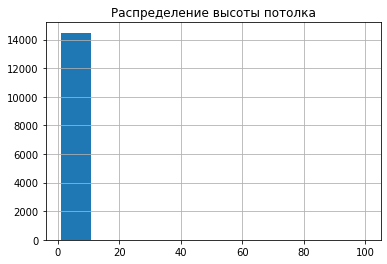

In [25]:
df.hist('ceiling_height', bins=10) # гистограмма распределения значений высоты потолка
plt.title('Распределение высоты потолка')  


Данная гистограмма не репрезентативна, явно есть выбросы в хвосте. Посмотрим на диаграмму размаха.

<function matplotlib.pyplot.show(close=None, block=None)>

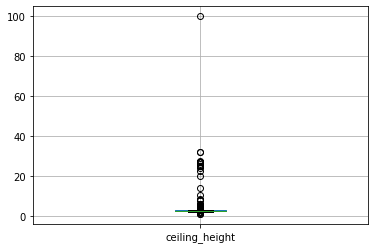

In [26]:
df.boxplot(column='ceiling_height') # диаграмма размаха по столбцу ceiling_height
plt.show

Помимо 100-метровых потолков, есть группа значений в 20-30 метров. Высота потолка спортивного зала в школе от 6 до 9 метров. С нашими данными явно что-то не так.<br>
Кроме того, есть еще слишком низкие потолки. Согласно [СанПиН СП 118.13330.2012 "Общественные здания и сооружения"](https://docs.cntd.ru/document/1200092705) высота потолков любых помещений, предназначенныз для проживания людей должны быть не менее 2.4м (что вполне соответствует медианному значению). Посмотрим на все аномальные значения (меньше 2.4 метров и больше 10):

In [27]:
df.query('ceiling_height < 2.4 or ceiling_height >= 10')['ceiling_height'].count()
# подсчет количества значений ceiling_height при высоте потолка меньше 2.4 метра или больше 10.

46

Всего 26 строк. Немного, на общую картину они не повлияют. <br>
Попробуем разделить на 10 все значения больше 10.

In [28]:
# с помощью np.where меняем значения в столбце ceiling_height не менее 10 на те же, деленные на 10
df['ceiling_height'] = np.where((df['ceiling_height'] >= 10), df['ceiling_height'] / 10, df['ceiling_height'])

Посмотрим теперь на диаграмму размаха:

<function matplotlib.pyplot.show(close=None, block=None)>

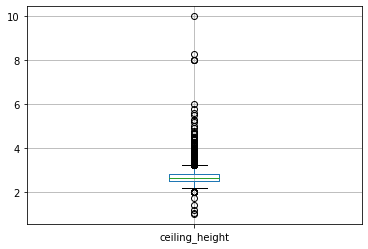

In [29]:
df.boxplot(column='ceiling_height') # диаграмма размаха по столбцу ceiling_height
plt.show

Теперь всё выглядит куда лучше. Посмотрим на явный отрыв в 10 метров:

In [30]:
df.query('ceiling_height == 10')

,airports_nearest,balcony,ceiling_height,city_centers_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,last_price,living_area,locality_name,open_plan,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,rooms,studio,total_area,total_images
22869,34963.0,5,10.0,8283.0,19.0,2018-07-25T00:00:00,5,5.0,True,11.0,15000000.0,14.0,Санкт-Петербург,False,1.0,223.0,3.0,30.0,1,False,25.0,0


Один объект: последний этаж, пять балконов, площадь 25 метров, при этом только кухня - 11, высота потолка в 10, при этом это апартаменты. Скорее всего, этот объект недвижимости аномален. Поскольку он один, оставим его. При дальнейшем анализе будет видно, стоит ли его удалить из датафрейма или нет.

По построенной диаграмме размаха видно, что есть еще отрывы в группе от 3.5 до 6 метров. Такие потолки бывают, тем более в Санкт-Петербурге. Оставим эти данные.
Тем не менее, есть еще невалидные значения, которые располагаются ниже нижней границы распределения, ниже "уса" нашей диаграммы. Найдем эту границу по формуле (Q1 - 1.5 * IQR), где Q1 - первый квартиль, IQR - интерквартильный размах.<br>
Далее, заменим все значения ниже этой границы на медианное значение столбца `ceiling_height` <a name="low_border"></a>:

In [31]:
# пишем функцию для поиска нижней границы boxplot, ниже которого значения невалидны
def low_border(Series):
    return (Series.quantile(0.25) - 1.5 * (Series.quantile(0.75) - Series.quantile(0.25)))

# Меняем все значения ceiling_height, ниже этой границы, на медианное значение
df['ceiling_height'] = (np.where((df['ceiling_height'] < low_border(df['ceiling_height'])), 
                                df['ceiling_height'].median(), df['ceiling_height'])
                       )

Теперь заменим все пропущенные значения высоты потолка `ceiling_height` на медианное:

In [32]:
df['ceiling_height'].fillna(df['ceiling_height'].median(), inplace=True) # меняем пустые значения на медианное

Посмотрим, как теперь распределены значения в этом столбце:

In [33]:
df['ceiling_height'].describe() # выводим описание основных метрик распределения столбца ceiling_height

count    23699.000000
mean         2.698417
std          0.236192
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

Стандартное отклонение в норме, медианное, минимальное и квартили тоже. Максимум - одно объявление, которое мы выявили выше.

Перейдем к следующему столбцу с пустыми значениями: `city_centers_nearest`, расстояние до центра города:<a name="city_centers_na"></a>

In [34]:
df_na(df['city_centers_nearest'])
# выводим количество пустых значений расстояния до центра

city_centers_nearest 	 5519 	 23%


Пропусков много, примерно как в столбце с расстоянием до ближайшего аэропорта `airports_nearest`.
Возможно, эти пропуски неслучайны и в основном содержатся в объявлениях  продаже недвижимости в деревенях и сёлах.

Посмотрим на уникальные значения названий населенных пунктов тех объявлений, где **НЕ** пропущены значения расстояния до центра:

In [35]:
# выводим уникальные значения населенных пунктов тех объявлений, где заполнено расстояние до центра
df.query('~city_centers_nearest.isna()', engine='python')['locality_name'].unique() 

array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Парголово',
       'Ломоносов', 'Петергоф', 'Пушкин', 'Колпино', 'Кронштадт',
       'посёлок Металлострой', 'Павловск', 'Сестрорецк', 'Красное Село',
       'посёлок Понтонный', 'Зеленогорск', 'посёлок Молодёжное',
       'посёлок Стрельна', 'посёлок Александровская', nan,
       'посёлок Песочный', 'посёлок Петро-Славянка', 'посёлок Репино',
       'посёлок Сапёрный', 'посёлок Щеглово', 'поселок Лисий Нос',
       'посёлок Левашово', 'посёлок Белоостров', 'поселок Мурино',
       'посёлок Лисий Нос', 'посёлок Усть-Ижора'], dtype=object)

Санкт-Петербург, другие города области и некоторые посёлки.

Посмотрим, много ли пропущенных значений `city_centers_nearest` в объявлениях о продаже недвижимости в Санкт-Петербурге:

In [36]:
# считаем длину списка объявлений, где пропущено расстояние до центра и недвижимость в Питере
len(df.query('city_centers_nearest.isna() and "Санкт-Петербург" in locality_name', engine='python'))

61

Для санкт-Петербурга, как самого большого города области, таких значений немного.<br>
Можем заменить пропущенные значения медианным для этого населенного пункта.
В других населенных пунктах из списка выше расстояние до центра не настолько критично при выборе недвижимости, как правило, стоимость недвижимости от этого не зависит (эти населенные пункты очень малы по  [численности](https://ru.wikipedia.org/wiki/Население_Ленинградской_области)).<br>

Заменим медианными значениями `city_centers_nearest` по указанным выше населенным пунктам все пустые значения:

In [37]:
# заполняем пустые значения столбца с расстоянием до центра города медианным значением расстояния до центра 
# с группировкой по населенному пункту
df['city_centers_nearest'] \
        .fillna(df.groupby('locality_name')['city_centers_nearest'].transform('median'), inplace=True)

Оставим пустые данные в столбце `city_centers_nearest` без изменения - это будет говорить о том, что пустые значения в данных о расстоянии до центра не имеют значения для анализа при продаже такой недвижимости.

Перейдем к столбцу `days_exposition` - сколько дней было размещено объявление (от публикации до снятия).<a name="days_exposition_na"></a>

Посмотрим на уникальные значения этого столбца:

In [38]:
df['days_exposition'].unique() # вывод уникальных значений количества дней, сколько было размещено объявление

array([  nan,   81.,  558., ..., 1360., 1007.,  971.])

Есть предположение, что отсутствие значений дней размещения объявления связано с тем, что такие объявления были размещены меньше чем на сутки и счетчик дней не округлил их до одного дня. Также возможно, что эти объявления ещё активны.<br>
Взглянем на пять таких случайных объявления:

In [39]:
df.query('days_exposition.isna()', engine='python').sample(5) # выводим 5 случайных объявления, в которых days_exposition не заполнено

,airports_nearest,balcony,ceiling_height,city_centers_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,last_price,living_area,locality_name,open_plan,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,rooms,studio,total_area,total_images
3845,NaN,0,2.50,NaN,NaN,2017-12-12T00:00:00,10,10.0,NaN,11.9,4650000.0,29.6,Сертолово,False,NaN,NaN,NaN,NaN,2,False,60.3,14
10929,31170.0,0,2.65,6498.0,NaN,2017-08-23T00:00:00,5,9.0,NaN,NaN,9610305.0,NaN,Санкт-Петербург,False,1.0,1057.0,1.0,563.0,1,False,61.0,13
15123,NaN,1,2.50,NaN,NaN,2018-09-13T00:00:00,4,5.0,NaN,5.5,1000000.0,18.0,Кириши,False,NaN,NaN,NaN,NaN,1,False,29.0,5
1917,18732.0,0,2.80,20444.0,NaN,2017-11-17T00:00:00,30,35.0,NaN,13.0,10150000.0,34.4,Санкт-Петербург,False,0.0,NaN,3.0,80.0,2,False,74.0,13
15558,49470.0,0,2.50,13931.0,NaN,2019-04-18T00:00:00,4,9.0,NaN,7.0,4850000.0,35.0,Санкт-Петербург,False,2.0,232.0,1.0,267.0,2,False,45.7,9


Явных аномалий в таких объявлениях не видно. Посмотрим, как распределены объявления по количеству дней размещения:

Text(0.5, 1.0, 'Длительность размещения объявлений')

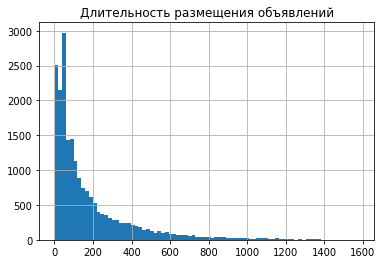

In [40]:
df.hist('days_exposition', bins=80) # строим гистограмму распределения days_exposition
plt.title('Длительность размещения объявлений')  

Похоже на распределение Пуассона с провалом около 50. Этот вид распределения характерен для подсчета числа событий, произошедших за фиксированное время. Продажа товаров, таких как недвижимость, подходит под события, подчиняющихся распределению Пуассона.

In [41]:
df.query('days_exposition == 0')['days_exposition'].count() # считаем количество значений days_exposition равных нулю

0

Значений `days_exposition`, равных нулю нет.<br>
Скорее всего, наше предположение насчет того, что пропущенные значения нулевые, - верно.

Заменим пустые значения `days_exposition` на ноль и посмотрим, как изменится гистограмма распределения количества объявлений относительно количества дней размещения:

Text(0.5, 1.0, 'Длительность размещения объявлений')

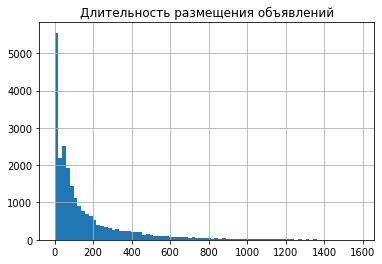

In [42]:
df['days_exposition'].fillna(0, inplace=True) # заполняем пустые значения нулями
df.hist('days_exposition', bins=80) # строим ещё одну гистрограмму с учетом заполненных нулями значений
plt.title('Длительность размещения объявлений') 

Получилось распределение с сильным завалом в нуле. Возможно, наше предположение оказалось неверным и пропущенные данные подвержены неочевидной закономерности. Тем не менее, других значений столбца `days_exposition` равных нулю, не было. Поэтому, можно принять условность, что теперь пропущенные значения этого столбца означают ноль дней. Возможно, объявление было выставлено по ошибке, либо выставлено с другими параметрами (например, продавец неверно указал цену и снял объявление с продажи, выставив позже с исправленными данными), а может объявление еще активно. Тут бы узнать у заказчика.

Целые значения дней имеют тип `float`. Возможно, есть значения с несколькими знаками после запятой. Посмотрим, есть ли такие числа:

In [43]:
# для каждого элемента столбца days_exposition проверяем, если разница между числом дней и его окрегленным значением больше нуля,
# значит есть "хвост" - значение имеет числа после запятой; это число добавляется во временный список, длину которого мы и выводим
len([item for item in df['days_exposition'] if item - round(item, 0) > 0])

3997

Таких значений довольно много. Округлим их до целого и приведем столбец к типу integer:

In [44]:
#df['days_exposition'] = round(df['days_exposition']).astype(int) # округряем days_exposition и приводим к типу integer
df['days_exposition'] = round(df['days_exposition']) # округряем days_exposition 

Перейдем к следующему столбцу `floors_total` - этажность здания, где продается объект недвижимости.<a name="floors_total_na"></a>
Посмотрим количество пропущенных значений и уникальные значения данного столбца:

In [45]:
df_na(df['floors_total']) # считаем количество пропущенных значений floors_total

floors_total 	 86 	 0%


In [46]:
df['floors_total'].unique() # выводим уникальные значения floors_total

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

Возможно, пропущенные значения - первый этаж, а объекты недвижимости - частные дома. Проверим это, выведем первые 5 объявлений, где этажность пропущена:

In [47]:
df.query('floors_total.isna()', engine='python').head() # выводим первые 5 объявления, где floors_total пропущен

,airports_nearest,balcony,ceiling_height,city_centers_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,last_price,living_area,locality_name,open_plan,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,rooms,studio,total_area,total_images
186,39197.0,0,2.65,12373.0,49.0,2018-10-02T00:00:00,4,NaN,NaN,12.00,11640000.0,30.80,Санкт-Петербург,False,1.0,123.0,0.0,NaN,2,False,65.2,12
237,22041.0,0,2.65,17369.0,251.0,2016-11-23T00:00:00,1,NaN,NaN,NaN,2438033.0,20.75,Санкт-Петербург,False,0.0,NaN,1.0,374.0,1,False,28.1,4
457,37364.0,0,2.65,8322.0,727.0,2015-08-01T00:00:00,12,NaN,NaN,10.63,9788348.0,38.40,Санкт-Петербург,False,2.0,309.0,2.0,706.0,2,False,70.8,4
671,22041.0,0,2.65,17369.0,123.0,2017-04-06T00:00:00,8,NaN,NaN,16.80,6051191.0,47.10,Санкт-Петербург,False,0.0,NaN,1.0,374.0,3,False,93.6,4
1757,22735.0,0,2.65,11618.0,77.0,2017-04-22T00:00:00,9,NaN,NaN,NaN,3600000.0,NaN,Санкт-Петербург,False,1.0,835.0,1.0,652.0,1,False,39.0,5


Среди этажей, на которых продаются объекты недвижимости, есть и 9, и 12. Скорее всего, пропуски носят случайный характер.<br>
Поскольку нет точного адреса объекта недвижимость, хоть как-то проверить этажность пропущенных значений нельзя.<br>
Заполним пропуски в `floors_total` значениями столбца `floor`. Это будет выглядеть вполне логично, данные не создадут аномалий, количество пропущенных значений невелико:

In [48]:
df['floors_total'].fillna(df['floor'], inplace=True) # заполняем пропуски в floors_total значениями floor.

Наконец, приведём столбец `floors_total` к типу integer:

In [49]:
df['floors_total'] = df['floors_total'].astype(int)

Перейдем к столбцу `is_apartment` - является ли объект недвижимости апартаментами.<a name="is_apartment_na"></a><br>
Выведем количество пустых значений:

In [50]:
df_na(df["is_apartment"])

is_apartment 	 20924 	 88%


Незаполненных значений очень много. Учитывая, что правовой статус продажи апартаментов в качестве жилой недвижимости до сих пор [не урегулирован](http://council.gov.ru/activity/activities/parliamentary/121625/), можно смело предположить, что большое количество объявлений будет именно о продаже жилой недвижимости, не являющихся апартаментами.<br>
Заполним пропущенные значения `is_apartment` значением `False`:

In [51]:
df['is_apartment'].fillna(False, inplace=True) # заполним пустые значения is_apartment значением False

In [52]:
df.groupby('is_apartment')['is_apartment'].count() # выведем количество объявлений по критерию is_apartment

is_apartment
False    23649
True        50
Name: is_apartment, dtype: int64

Перейдем к столбцу `kitchen_area` - площадь кухни в квадратных метрах. Посмотрим на количество пропущенных данных:<a name="kitchen_area_na"></a>

In [53]:
df['kitchen_area'].isna().sum() # считаем количество пропущенных значений kitchen_area

2278

In [54]:
df_na(df['kitchen_area']) # столько пропущенных значений составляет процентов от общего количества объявлений

kitchen_area 	 2278 	 10%


Пропущено 10% от общего количества значений. Попробуем найти закономерности, выведем 5 случайных объявления, где `kitchen_area` пропущено:

In [55]:
df.query('kitchen_area.isna()', engine='python').sample(5) # выводим 5 случайных объявления, где пропущен размер кухни

,airports_nearest,balcony,ceiling_height,city_centers_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,last_price,living_area,locality_name,open_plan,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,rooms,studio,total_area,total_images
9828,25072.0,0,2.65,28497.0,446.0,2015-12-09T00:00:00,2,4,False,NaN,2460000.0,NaN,Красное Село,False,0.0,NaN,0.0,NaN,1,False,31.0,0
14980,NaN,2,2.65,NaN,183.0,2016-02-02T00:00:00,11,16,False,NaN,2400000.0,14.5,деревня Кудрово,False,NaN,NaN,NaN,NaN,1,False,23.0,6
6780,37364.0,0,2.70,8322.0,14.0,2019-01-29T00:00:00,8,23,False,NaN,6082790.0,43.6,Санкт-Петербург,False,2.0,309.0,2.0,706.0,3,False,79.0,4
18919,NaN,0,2.50,NaN,101.0,2017-12-19T00:00:00,3,3,False,NaN,1200000.0,NaN,Подпорожье,False,NaN,NaN,NaN,NaN,2,False,40.0,15
16456,26815.0,0,2.65,5517.0,122.0,2017-06-23T00:00:00,6,6,False,NaN,8990000.0,NaN,Санкт-Петербург,False,1.0,210.0,0.0,NaN,3,False,105.1,1


Закономерности не видно. Попробуем вывести 5 случайных объявления, отобразив данные, содержащие площадь и характеристики помещения:

In [56]:
# выводим только характеристики помещения из объявлений, среди тех, где пропущена площадь кухни
df.query('kitchen_area.isna()', engine='python')[['kitchen_area', 'living_area', 'rooms', 'studio', 'balcony', 'total_area']].sample(5)

,kitchen_area,living_area,rooms,studio,balcony,total_area
8708,NaN,NaN,1,False,0,42.4
16605,NaN,16.0,1,False,0,32.0
14111,NaN,NaN,1,False,0,31.0
21234,NaN,NaN,3,False,2,83.0
16665,NaN,NaN,1,False,0,33.2


Снова очевидных причин пропусков не видно. Посмотрим, как распределены значения `kitchen_area` в датафрейме:

In [57]:
df['kitchen_area'].describe() # распределение размера кухни по объявлениям

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

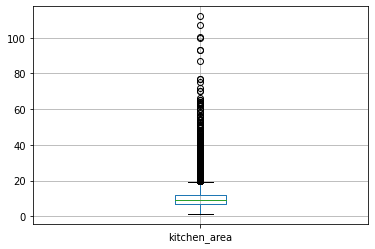

In [58]:
df.boxplot('kitchen_area') # диаграмма размаха по площади кухни
plt.show()

Стандартное отклонение - почти 6 квадратных метров. Заполнить пропуски медианным значением нельзя - можно сильно исказить данные.<br>
Посмотрим на отрывы, имеют ли они случайный характер:

In [59]:
# выводим площади кухни, жилой зоны и общей площади среди тех объявлений, где площадь кухни больше 20 квадратных метров
df.query('kitchen_area > 20', engine='python')[['kitchen_area', 'living_area', 'total_area']] 

,kitchen_area,living_area,total_area
0,25.00,51.00,108.00
4,41.00,32.00,100.00
51,50.00,38.00,161.00
110,23.60,27.40,72.30
121,24.00,86.00,180.00
...,...,...,...
23491,45.00,104.00,250.00
23507,21.55,31.65,73.83
23549,24.50,55.70,184.00
23590,23.60,50.40,123.30


Судя по всему, отрывы неслучайны, просто продаваемая недвижимость имеет большую площадь, размеры кухни в таких объектах достаточно большие.

Посмотрим на коэффициент корреляции площади кухни относительно общей площади помещения:

In [60]:
df['kitchen_area'].corr(df['total_area']) # считаем коэффициент корреляции Пирсона между площадью кухни и общей площадью недвижимости

0.6091211711198314

Коэффициент положительный и больше 0.5. Нужно визуализировать данные. Заодно посмотреть, как распределяется площадь кухни относительно жилой площади.

array([[<AxesSubplot:xlabel='kitchen_area', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='kitchen_area'>],
       [<AxesSubplot:xlabel='kitchen_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='living_area'>],
       [<AxesSubplot:xlabel='kitchen_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>]],
      dtype=object)

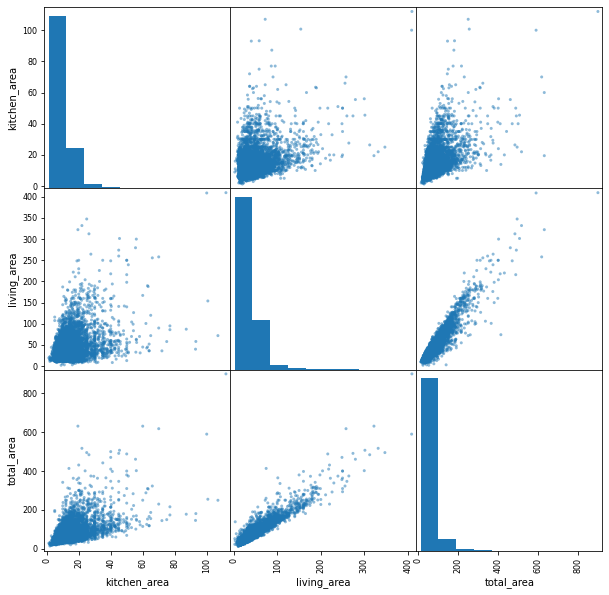

In [61]:
# строим матрицу рассеивания между площадью кухни, жилой и общей площадью
pd.plotting.scatter_matrix(df[['kitchen_area', 'living_area','total_area']], figsize=(10, 10)) 

Очевидная положительная корреляция видна лишь у значений `living_area` и `total_area`.<br>
Размер объекта недвижимости, несмотря на коэффициент Пирсона равный 0.6, не влияет на размер кухни. Возможно, взаимосвязь нелинейная.

Ознакомившись с [Жилищным Кодексом](https://docs.cntd.ru/document/456054198) РФ можно установить, что если кухня есть, что она не может быть меньше 5 квадратных метров, либо устанавливают размер кухни исходя из минимального размера комнаты в квартирах-студии: минимальный размер комнаты - 9 квадратных метров, остальное - кухня.
Можно определить размер кухни, исходя из того, что в объекте недвижимости есть жилая площадь более 9 квадратных метров. Но данное определение верно только для помещений, предназначенных для постоянного проживания (не для гостиниц и общежитий). 

Поскольку мы пользуемся Яндекс Недвижимостью, то все объявления у нас - жилые, предназначенные для постоянного проживания людей. Но это могут быть и комнаты обычных или коммунальных квартирах (что характерно для Санкт-Петербурга) - в них, как правило, одна кухня на несколько комнат.

Заполним пустые значения `kitchen_area` значением 5 в том случае, если `living_area` не меньше 9, `is_apartment` ложно (не апартаменты) и количество комнат `rooms` больше 1 (исключим комнату в коммунальной квартире или отдельно продаваемую комнату в квартире):

In [62]:
# если kitchen_area не заполнено, living_area >= 9 и это не апартаменты, то заполняем значение kitchen_area пятью
df.loc[(df['kitchen_area'].isna()) 
   & (df['living_area'] >= 9) 
   & (df['rooms'] > 1)
   & (df['is_apartment'] == False), 'kitchen_area'] = 5 

In [63]:
df['kitchen_area'].isna().sum() # смотрим на количество пропусков

1965

Заполнено более 300 пустых значений. Тоже результат. Остальные пустые значения `kitchen_area` оставим незаполненным, поскольку заполнять медианными данными или данными в соответствии с коэффициентом Пирсона, нельзя (выше мы объяснили почему).

Перейдём к происку пропусков в `living_area` - жилая площадь в квадратных метрах.<a name="living_area_na"></a><br>
Посмотрим на количество пропущенных значений:

In [64]:
df_na(df['living_area'])

living_area 	 1903 	 8%


Пропущенных значений жилой площади - 1903, что составляет 8% от числа объявлений. Большой процент, чтобы повлиять на наше исследование.<br>
Чуть выше на матрице рассеивания мы видели зависимость жилой площади и общей площади недвжимости. Выведем отдельно диаграмму рассеивания этих столбцов и подсчитаем коэффициент Пирсона:

Text(0.5, 1.0, 'Распределение жилой площади относительно общей')

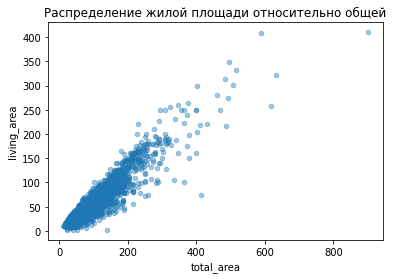

In [65]:
df.plot(x='total_area', y='living_area', kind='scatter', alpha=0.4) # выводим диаграмму рассеивания общей площади относительно жилой
plt.title('Распределение жилой площади относительно общей')

In [66]:
df['living_area'].corr(df['total_area']) # вычисляем коэффициент корреляции

0.9395373338721491

Коэффициент близок к единице, из диаграммы также видно, как все значения распределены как буд-то вдоль одной прямой.<br>
Построим регрессионную прямую, проверив предположение, что данные распределены в соответствии с линейной регрессией

Text(0.5, 1.0, 'Распределение жилой и общей площади с трендом')

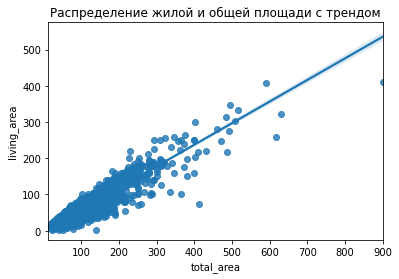

In [67]:
sps.regplot(x='total_area', y='living_area', data=df) # строим рассеивание с регрессионной прямой
plt.title('Распределение жилой и общей площади с трендом')

Можно было бы заполнить пустые значения данными регрессионного анализа с использованием математической модели. Но у нас такой нет.

Посмотрим на случайные 5 строк датафрейма, где `living_area` не заполнено, поищем закономерности:

In [68]:
df.query('living_area.isna()', engine='python').sample(5)

,airports_nearest,balcony,ceiling_height,city_centers_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,last_price,living_area,locality_name,open_plan,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,rooms,studio,total_area,total_images
1513,35979.0,2,2.80,16280.0,121.0,2018-08-14T00:00:00,2,10,False,29.0,9500000.0,NaN,Санкт-Петербург,False,0.0,NaN,0.0,NaN,3,False,114.00,12
13034,NaN,0,2.50,NaN,44.0,2018-03-25T00:00:00,2,5,False,NaN,2350000.0,NaN,деревня Старая,False,NaN,NaN,NaN,NaN,4,False,42.00,11
12352,18978.0,0,2.65,4600.0,0.0,2018-08-03T00:00:00,4,4,False,NaN,19900000.0,NaN,Санкт-Петербург,False,0.0,NaN,1.0,931.0,3,False,124.32,5
20846,24875.0,0,2.50,30661.0,45.0,2018-01-13T00:00:00,12,12,False,NaN,4250000.0,NaN,Колпино,False,1.0,49.0,0.0,NaN,2,False,51.00,10
13221,49058.0,1,2.65,14883.0,15.0,2018-10-27T00:00:00,22,26,False,NaN,5199000.0,NaN,Санкт-Петербург,False,1.0,265.0,1.0,572.0,1,False,36.00,10


In [69]:
df['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Text(0.5, 1.0, 'Жилая площадь')

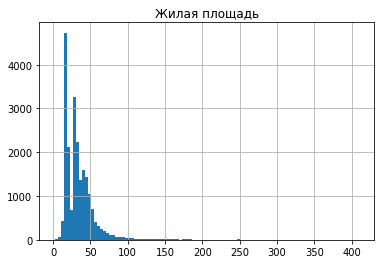

In [70]:
df.hist('living_area', bins=100) # посмотрим на гистограмму распределения жилой площади
plt.title('Жилая площадь')

На гистограмме распределения значений `living_area` есть пропуски около 25 квадратных метров.<br>
Других явных закономерностей нет, возможно, данные пропущены случайно.

Посмотрим на распределение `total_area` в пропущенных и **не** пропущенных значениях `living_area`:

Text(0.5, 1.0, 'Распределение общей площади по пропущенным и НЕ пропущенным значениям жилой площади')

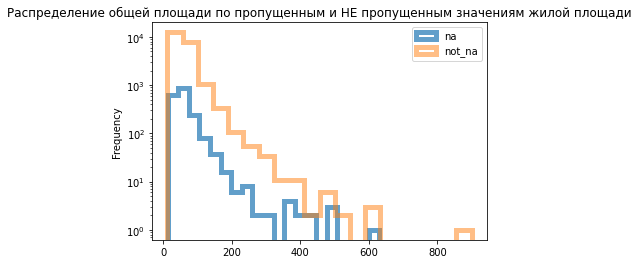

In [71]:
# наложим две гистограммы total_area, в синей - пропущенные значения living_area, в оранжевой - непропущенные
# используем логарифмическую шкалу для оси ординат, чтобы было удобнее сопоставить графики
ax = df.query('living_area.isna()', engine='python').plot(kind='hist', 
                                         y='total_area', 
                                         alpha=0.7, 
                                         bins=20, 
                                         label='na', 
                                         histtype='step', 
                                         linewidth=5, log=True)

df.query('~living_area.isna()', engine='python').plot(kind='hist', y='total_area', 
                                     alpha=0.5, 
                                     bins=20, 
                                     ax=ax, 
                                     label='not_na', 
                                     linewidth=5, 
                                     histtype='step')
plt.title('Распределение общей площади по пропущенным и НЕ пропущенным значениям жилой площади')

Распределения очень похожи. Значит, можно заменить пропущенные значения `living_area` медианными значениями `living_area` с группировкой по `total_area`:

In [72]:
df['total_area_rounded'] = round(df['total_area'], -1) # создадим временный столбец total_area_rounded, в котором общая площадь недвижимости
# округлена до десятков

# заполним пропущенные значения living_area медианными значениями living_area, сгруппированными по total_area_rounded
# данные запишем во временную таблицу living_area_filled
df['living_area_filled'] = df['living_area'].fillna(df.groupby('total_area_rounded')['living_area'].transform('median'))

Посмотрим, сколько осталось пустых значений:

In [73]:
df['living_area_filled'].isna().sum() # количество пустых значений во временном столбце living_area_filled

2

In [74]:
df.query('living_area_filled.isna()', engine='python') # выведем эти строки

,airports_nearest,balcony,ceiling_height,city_centers_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,last_price,living_area,locality_name,open_plan,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,rooms,studio,total_area,total_images,total_area_rounded,living_area_filled
3676,20552.0,0,2.65,5181.0,0.0,2019-01-23T00:00:00,6,6,False,35.05,28789000.0,NaN,Санкт-Петербург,False,0.0,NaN,0.0,NaN,4,False,441.98,12,440.0,NaN
22131,46625.0,0,2.70,16554.0,0.0,2018-10-18T00:00:00,11,13,False,NaN,27000000.0,NaN,Санкт-Петербург,False,0.0,NaN,0.0,NaN,5,False,422.20,14,420.0,NaN


Не нашлось медианных значений `living_area` для `total_area_rounded` равных 420 и 440.

Возьмем чуть большие границы `total_area_rounded`, чтобы вычислить медиану `living_area`:

In [75]:
df.query('400 < total_area_rounded < 460')['living_area'].median()

218.0

Заменим оставшиеся пустые поля в `living_area_filled` значением 218:

In [76]:
df['living_area_filled'].fillna(218, inplace=True)

Посмотрим, как изменилось распределение `living_area` после преобразований. Наложим одну гистограмму на другую:

<AxesSubplot:title={'center':'Сравнение распределений living_area до заполнения пропущенных значений и после'}, ylabel='Frequency'>

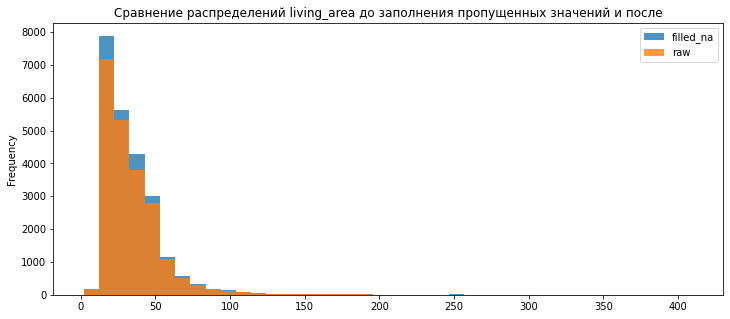

In [77]:
# строим в одних координатах две гистограммы распределения незаполненных (raw - сырых) данных living_area и с заполненными пустыми значениями
# по столбцу living_area_filled - filled
ax = df.plot(kind='hist', 
             y='living_area_filled', 
             alpha=0.8, 
             bins=40, 
             label='filled_na',
             linewidth=5)

df.plot(kind='hist', y='living_area', 
        alpha=0.8, 
        bins=40,
        ax=ax, 
        label='raw',
        title='Сравнение распределений living_area до заполнения пропущенных значений и после',
        linewidth=5, 
        figsize=(12,5))

In [78]:
# сравним основные метрики распределения жилой площади до заполнения пустыми значениями и после
df[['living_area_filled', 'living_area']].describe() 

,living_area_filled,living_area
count,23699.000000,21796.000000
mean,34.608455,34.457852
std,22.551417,22.030445
min,2.000000,2.000000
25%,19.000000,18.600000
50%,30.000000,30.000000
75%,42.260000,42.300000
max,409.700000,409.700000


Основные значения распределения данных величин практически не изменились. Можно сказать, что мы справились с заполнением пустых значений.<br>
Осталось заполнить столбец `living_area` значениями `living_area_filled` и удалить все временные столбцы (`total_area_rounded` и `living_area_filled`):

In [79]:
df['living_area'] = df['living_area_filled'] # заполняем столбец living_area заполненными значениями столбца living_area_filled

df.drop(['total_area_rounded', 'living_area_filled'], axis=1, inplace=True) # удаляем временные столбцы

Проверяем незаполненные значения датафрейма:

In [80]:
df.isna().sum()

airports_nearest         5394
balcony                     0
ceiling_height              0
city_centers_nearest     5394
days_exposition             0
first_day_exposition        0
floor                       0
floors_total                0
is_apartment                0
kitchen_area             1965
last_price                  0
living_area                 0
locality_name              49
open_plan                   0
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
rooms                       0
studio                      0
total_area                  0
total_images                0
dtype: int64

Перейдем к столбцу `locality_name` - название населенного пункта. Посмотрим на случайные 5 объявлений с незаполненными названиями:<a name="locality_name_na"></a>

In [81]:
df.query('locality_name.isna()', engine='python').sample(5)

,airports_nearest,balcony,ceiling_height,city_centers_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,last_price,living_area,locality_name,open_plan,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,rooms,studio,total_area,total_images
2033,NaN,0,2.65,NaN,34.0,2017-05-30T00:00:00,2,4,False,18.6,5398000.0,42.6,NaN,False,NaN,NaN,NaN,NaN,3,False,80.0,6
14342,NaN,1,2.65,NaN,92.0,2017-04-27T00:00:00,3,4,False,NaN,3611000.0,25.8,NaN,False,NaN,NaN,NaN,NaN,1,False,53.5,3
8568,24233.0,0,2.65,4065.0,248.0,2016-05-09T00:00:00,3,6,False,23.0,16000000.0,94.0,NaN,False,1.0,547.0,0.0,NaN,3,False,155.0,10
19972,22041.0,0,2.65,17369.0,278.0,2015-09-20T00:00:00,21,24,False,8.2,4361004.0,33.1,NaN,False,0.0,NaN,1.0,374.0,2,False,62.4,20
21715,NaN,0,2.65,NaN,176.0,2018-07-30T00:00:00,2,9,False,29.2,6047550.0,30.5,NaN,False,NaN,NaN,NaN,NaN,2,False,80.1,2


Скорее всего, данные пропущены случайно.<br>
С названиями населенных пунктов могут быть связаны расстояние до центра города, расстояние до аэропорта, количество парков и водоемов.<br>
Пропущенных названий всего 49, и они не помешают нашему исследованию.<br>
Тем не менее, попробуем заполнить пропущенные названия населенных пунктов методом "горячей колоды", найдя объекты недвижимости, максимально похожие по расстоянию до аэропорта, центра, количества парков и водоемов в радиусе 3000м:

In [82]:
# создадим таблицу df_loc_name_agg, содержащую уникальные значения названия населенного пункта,
# расстояния до аэропорта и центра, количества парков и водоемов в радиусе 3км
df_loc_name_agg = df[['locality_name',
                     'airports_nearest', 
                     'city_centers_nearest', 
                     'parks_around_3000', 
                     'ponds_around_3000']] \
        .drop_duplicates() \
        .dropna()

# теперь создадим еще один временный датафрейм, содержащий объединение из оригинального датафрейма
# с пустыми значениями населенного пункта и 'df_loc_name_agg', по общим полям расстояний до выделенных объектов
# режим объединения - 'left'
# сохраняем индексы для дальнейшей замены
df_loc_name_filled = df.query('locality_name.isna()', engine='python') \
        .merge(df_loc_name_agg, 
               on= [
                   'airports_nearest', 
                   'city_centers_nearest', 
                   'parks_around_3000', 
                   'ponds_around_3000'
                   ],
               how='left') \
        .set_index(df.query('locality_name.isna()', engine='python').index)

# подсчитаем тепеь количество пропущенных значений после замены на максимально похожие названия
df_loc_name_filled['locality_name_y'].isna().sum()

31

Заменим значения `locality_name` в `df` на соответствующие значения `locality_name_y` из `df_loc_name_filled`:

In [83]:
# заполняем пропущенные значения locality_name соответствующими по индексу значениями из df_loc_name_filled
df['locality_name'].fillna(df_loc_name_filled['locality_name_y'], inplace=True) 

del df_loc_name_agg, df_loc_name_filled  # удаляем временные датафреймы

In [84]:
df['locality_name'].isna().sum() # проверяем оставшееся количество пустых значений locality_name

31

Оставшиеся незаполненные значения оставим без изменения - мы не можем точно определить, какому населенному пункту они соответствуют.

Необработанные пустые значения остались в столбцах `parks_around_3000`, `parks_nearest`, `ponds_around_3000` и `ponds_nearest`.<a name="parks_ponds_na"></a><br>
Всё это - расстояния до парков и водоёмов и их количество в радиусе 3км. Посмотрим, каким уникальным населенным пунктам они соответствуют:

In [85]:
# вывод уникальных значений locality_name для объявлений, где количество парков в радиусе 3км не заполнено
len(df.query('parks_around_3000.isna()', engine='python')['locality_name'].unique()) 

345

In [86]:
# # вывод уникальных значений locality_name для объявлений, где количество водоемов в радиусе 3км не заполнено
len(df.query('ponds_nearest.isna()', engine='python')['locality_name'].unique())

361

In [87]:
len(df['locality_name'].unique()) # количество всех уникальных населенных пунктов

365

Здесь все населенные пункты, которые есть в датафрейме. Количество пустых значений к каждом из четырех оставшихся столбцов:

In [88]:
df[['parks_nearest', 'ponds_nearest', 'parks_around_3000', 'ponds_around_3000']].isna().sum() # сумма незаполненных значений исследуемых столбцов

parks_nearest        15620
ponds_nearest        14589
parks_around_3000     5518
ponds_around_3000     5518
dtype: int64

In [89]:
# выводим количество объявлений, где не заполнено количество парков в радиусе 3км, но заполнено количество водоемов в радиусе 3км
len(df.query('parks_around_3000.isna() and ~ponds_around_3000.isna()', engine='python'))

0

In [90]:
# то же - для расстояния до ближайшего парка и водоема
len(df.query('parks_nearest.isna() and ~ponds_nearest.isna()', engine='python')['locality_name'].unique())

20

In [91]:
# количество и процент незаполненных значений расстояния до парка от длины датафрейма
df_na(df['parks_nearest'])

parks_nearest 	 15620 	 66%


In [92]:
# процент незаполненных значений количества парков в радиусе 3км 
df_na(df['parks_around_3000'])

parks_around_3000 	 5518 	 23%


Пропущенных значений о количестве ближайших водоемов и парков 23% от всей длины датафрейма, при этом они содержатся в одних и тех же объявлениях.
Пропущенных значений о расстоянии до ближайшего парка или водоема - 66% от всей длины датафрейма.

In [93]:
# посмотрим на характеристики распределения исследуемых столбцов
df[['parks_nearest', 'ponds_nearest', 'parks_around_3000', 'ponds_around_3000']].describe() 

,parks_nearest,ponds_nearest,parks_around_3000,ponds_around_3000
count,8079.000000,9110.000000,18181.000000,18181.000000
mean,490.804555,517.980900,0.611408,0.770255
std,342.317995,277.720643,0.802074,0.938346
min,1.000000,13.000000,0.000000,0.000000
25%,288.000000,294.000000,0.000000,0.000000
50%,455.000000,502.000000,0.000000,1.000000
75%,612.000000,729.000000,1.000000,1.000000
max,3190.000000,1344.000000,3.000000,3.000000


Text(0.5, 1.0, 'Количество водоемов в радиусе 3км')

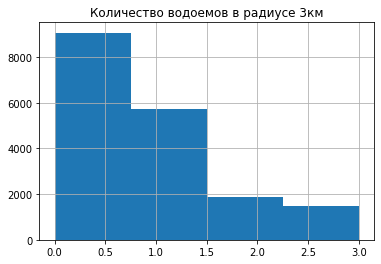

In [94]:
df.hist('ponds_around_3000', bins=4)
plt.title('Количество водоемов в радиусе 3км') # посмотрим на распределение значений ponds_around_3000

Text(0.5, 1.0, 'Количество водоемов относительно цены')

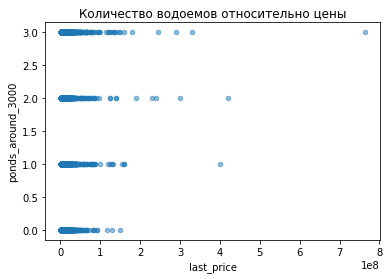

In [95]:
# Посмотрим распределение значений ponds_around_3000 по последней цене на недвижимость
df.plot(x='last_price', y='ponds_around_3000', kind='scatter', alpha=0.5).set_title('Количество водоемов относительно цены')

Поскольку таких пропущенных значений достаточно много в датафрейме, их пропуски могут объясняться отсутствием информации у продавцов о количестве и расстоянии до парков и водоёмов. 

Возможно также, что функция добавления такой информации появилась относительно недавно и не пользовалась интересом у продавцов недвижимости.

Заполнить пропуски известными значениями, используя метод "горячей колоды", нельзя - пропусков очень много и они неочевидны.<br>

Заполнить значения медианными можно сделать для количества парков и водоемов в радиусе 3км - `parks_around_3000` и `ponds_around_3000`. 
Медианное значение равно нулю, стандартное отклонение близко к единице. Даже третий квартиль равен 1. Можно сделать вывод, что эта величина при обработке объявления не влияет на продажу.

Значения `parks_nearest` и `ponds_nearest` оставим незаполненными.

In [96]:
# заполним медианными значениями столбцы ponds_around_3000 и parks_around_3000
df['ponds_around_3000'].fillna(df['ponds_around_3000'].mean(), inplace=True) 
df['parks_around_3000'].fillna(df['parks_around_3000'].mean(), inplace=True)

# приведем их к типу integer
df['ponds_around_3000'] = df['ponds_around_3000'].astype(int)
df['parks_around_3000'] = df['parks_around_3000'].astype(int)

In [97]:
# Проверяем незаполненные значения
df.isna().sum()

airports_nearest         5394
balcony                     0
ceiling_height              0
city_centers_nearest     5394
days_exposition             0
first_day_exposition        0
floor                       0
floors_total                0
is_apartment                0
kitchen_area             1965
last_price                  0
living_area                 0
locality_name              31
open_plan                   0
parks_around_3000           0
parks_nearest           15620
ponds_around_3000           0
ponds_nearest           14589
rooms                       0
studio                      0
total_area                  0
total_images                0
dtype: int64

**Вывод:** мы заполнили пропущенные значения в большинстве столбцов, где это было необходимо, используя разные методы для их заполнения. Определили возможные причины их появления. В ходе работы с пропусками в столбцах преобразовали данные в них в нужные типы. Посмотрели распределения значений всех столбцов, где были пропуски. Это пригодится нам в дальнейшем в нашем исследовании.

### 3.2 Приведение типов данных, работа с аномалиями <a name="art_fix"></a>

Посмотрим на типы столбцов и приведем необходимое к нужному типу:

In [98]:
df.dtypes

airports_nearest        float64
balcony                   int64
ceiling_height          float64
city_centers_nearest    float64
days_exposition         float64
first_day_exposition     object
floor                     int64
floors_total              int64
is_apartment               bool
kitchen_area            float64
last_price              float64
living_area             float64
locality_name            object
open_plan                  bool
parks_around_3000         int64
parks_nearest           float64
ponds_around_3000         int64
ponds_nearest           float64
rooms                     int64
studio                     bool
total_area              float64
total_images              int64
dtype: object

Приведем столбец `days_exposition` к типу int:

In [99]:
df['days_exposition'] = df['days_exposition'].astype(int)

В предыдущем разделе мы привели почти столбцы с пропущенными значениями к единому типу (там, где это было нужно).
Из всего датафрейма остался столбец `first_day_exposition` - его нужно привести к типу `datetime`:

In [100]:
df['first_day_exposition'].sample(3) # посмотрим на три случайных значения first_day_exposition - первого дня выставления объявления

6105    2017-08-16T00:00:00
3411    2017-01-22T00:00:00
8684    2017-12-12T00:00:00
Name: first_day_exposition, dtype: object

Приведем столбец `first_day_exposition` к форматы `datetime`, округлив значение до одного дня, поскольку данные о часе, минуте и секунде обнулены - дата высталвения объявления на продажу считалась только по дню, без учета часов, минут и секунд.

In [101]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') \
                               .dt.round('1D')
# приводим к нужному формату по маске и округляем до 1 дня

In [102]:
# проверим, что получилось:
df['first_day_exposition'].sample(3)

23274   2016-11-25
22114   2018-03-30
6833    2017-12-25
Name: first_day_exposition, dtype: datetime64[ns]

Посмотрим на распределение последней цены - `last_price`:

In [103]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Максимальное значение очень велико, хотя третий квартиль на два порядка меньше.

Построим гистрограмму распределения `last_price`:

Text(0.5, 1.0, 'Распределение цены')

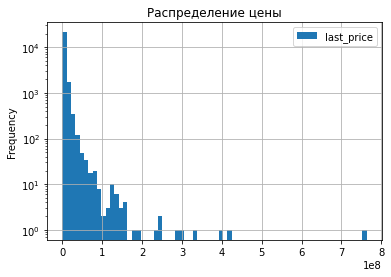

In [104]:
df.plot(kind='hist', y='last_price', bins=70, grid=True, log=True).set_title('Распределение цены') # включим логарифмическую шкалу и линии сетки

Большое скопление данных около нуля, при этом явный маленьких хвост из выбросов. Посмотрим на диаграмму размаха `last_price`:

<AxesSubplot:>

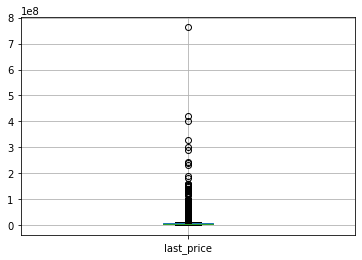

In [105]:
df.boxplot(column='last_price')

Хвост из выбросов подтверждается. Есть объекты недвижимости, стоимостью более 700млн руб. Такие цены бывают в объявлениях элитной недвижимости.

Посмотрим на минимальные значения:

In [106]:
df['last_price'].min()

12190.0

Трудно представить жильё с ценой 12 тыс. руб.

In [107]:
df['last_price'].quantile(0.001) # подсчитаем цену жилья, которая попадает в распределение по количеству ниже 0.1%

550000.0

In [108]:
df['last_price'].count() * 0.001

23.699

Большая цена, выше на пару порядков, может серьезно изменить графики исследования в дальнейшем.
Посмотрим, сколько жилья продается по цене больше 200млн руб:

In [109]:
df.query('last_price > 2e8')['last_price'].count()

9

Всего 9 объявления - очевидные отрывы. Можем ими принебречь, в нашем распределении всё равно остается очень много жилья, цена которого выходит на усы нашего `boxplot`.

Таких значений всего около 23. Можно удалить все объявления, стоимость жилья в которых меньше 550 000 руб. На исследования они не повлияют.

In [110]:
df = df.query('550000 < last_price < 2e8') # создаем новый датафрейм без аномалий цены.

Посмотрим на столбец с общей площадью недвижимости `total_area`:

In [111]:
df['total_area'].describe()

count    23664.000000
mean        60.228659
std         34.681422
min         12.000000
25%         40.000000
50%         52.000000
75%         69.825000
max        631.200000
Name: total_area, dtype: float64

Text(0.5, 1.0, 'Общая площадь - распределение')

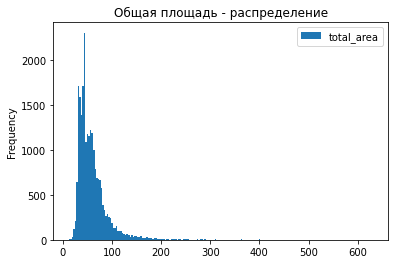

In [112]:
df.plot(kind='hist', y='total_area', bins = 200).set_title('Общая площадь - распределение')

Распределение ровное, визуально коррелирует с распределением столбца `last_price`, который мы видели выше.

Посмотрим на него же с логарифмической шкалой, чтобы увидеть возможные всплески в хвоте выброса:

Text(0.5, 1.0, 'Общая площадь - логарифмическая шкала')

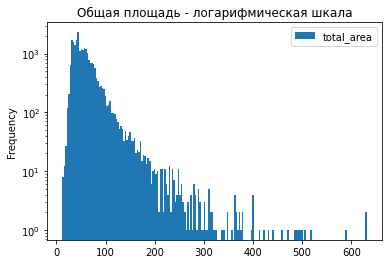

In [113]:
df.plot(kind='hist', y='total_area', bins = 200, log=True).set_title('Общая площадь - логарифмическая шкала')

Аномалий не обнаружено. Действительно, есть объекты недвижимости с площадью около 900 квадратных метров, которые находятся в продаже.

Посмотрим на столбец `rooms`:

In [114]:
df['rooms'].describe()

count    23664.000000
mean         2.069895
std          1.074820
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

19 комнат ещё можно себе представить в Санкт-Петербурге, но вот 0 комнат - странно. Может быть так обозначают студии.<br>
Выведем 10 случайных объявления, где `rooms` равно нулю:

In [115]:
df.query('rooms == 0').sample(10)

,airports_nearest,balcony,ceiling_height,city_centers_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,last_price,living_area,locality_name,open_plan,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,rooms,studio,total_area,total_images
6364,NaN,0,2.70,NaN,131,2018-08-09,5,25,False,NaN,2820000.0,17.85,Кудрово,False,0,NaN,0,NaN,0,True,27.81,5
9586,NaN,0,2.65,NaN,45,2017-09-27,3,9,False,NaN,1670000.0,18.20,Никольское,True,0,NaN,0,NaN,0,False,28.30,7
21111,NaN,2,2.65,NaN,160,2018-03-01,5,12,False,NaN,2050000.0,18.44,городской посёлок Новоселье,False,0,NaN,0,NaN,0,True,28.16,13
8718,10796.0,2,2.80,14361.0,50,2018-02-27,7,16,False,NaN,4000000.0,22.00,Санкт-Петербург,False,0,NaN,0,NaN,0,True,26.00,10
22246,41935.0,1,2.70,9551.0,59,2018-05-29,15,16,False,NaN,3100000.0,23.30,Санкт-Петербург,False,0,NaN,0,NaN,0,True,27.30,6
17483,10796.0,2,2.65,14361.0,30,2017-11-26,3,7,False,NaN,4100000.0,17.90,Санкт-Петербург,False,0,NaN,0,NaN,0,True,26.00,14
18185,NaN,0,2.65,NaN,34,2018-09-11,2,17,False,NaN,2300000.0,15.00,посёлок Мурино,False,0,NaN,0,NaN,0,True,25.00,6
8755,37636.0,0,2.75,14479.0,128,2017-11-22,1,19,False,NaN,1350000.0,15.80,Санкт-Петербург,False,0,NaN,1,1127.0,0,True,18.80,1
11705,15706.0,1,2.80,7734.0,45,2018-02-20,8,17,False,NaN,3380000.0,17.00,Санкт-Петербург,True,2,592.0,1,802.0,0,False,26.00,5
2719,NaN,2,2.65,NaN,384,2017-08-16,12,25,False,NaN,2400000.0,21.00,посёлок Мурино,False,0,NaN,0,NaN,0,True,25.00,18


У объявлений, где количество комнат равно нулю - нет площади кухни и это не апартаменты. При этом есть и студии, и не только. Проверим:

In [116]:
df.query('rooms == 0')['rooms'].count() # количество объявлений, где rooms = 0

197

In [117]:
# проверка, все ли объявления, где rooms = 0 содержат kitchen_area = 0 и это не апартаменты
df.query('rooms == 0 and (kitchen_area == 0 or ~is_apartment)')['rooms'].count() 

197

То есть у нас есть объекты недвижимости, где нет ни комнат, ни кухни, при этом оно предназначено для постоянного проживания людей.<br>
Здесь что-то не так.
Посмотрим жилую площадь таких объявлений:

In [118]:
df.query('rooms == 0')['living_area'].describe()

count    197.000000
mean      19.836244
std       16.952191
min        2.000000
25%       16.000000
50%       18.000000
75%       19.600000
max      239.400000
Name: living_area, dtype: float64

Жилая площадь есть. Минимум 2 квадратных метра - это явная аномалия, но нулевых значений нет. В контексте исследования `rooms` это важно.

Заменим значения `rooms` = 0 на 1 для всех объявлений, где есть жилая площадь:

In [119]:
# присваиваем единицу всем значениям столбца 'rooms', где жилая площадь больше нуля и текущее значение 'rooms' = 0
df.loc[(df['living_area'] > 0) & (df['rooms'] == 0), 'rooms'] = 1  

In [120]:
df['living_area'].isna().sum()

0

**Вывод:** мы привели дату публикации объявления к типу `datetime`, проверили столбцы со стоимостью, общей площадью жилья, заменили нулевые значения количества комнат. Аномалий в других данных мы не обнаружено.

### 3.3 Поиск дубликатов <a name="duobl_find"></a>

In [121]:
df.duplicated().sum()

0

Дубликатов нет. Переходим к следующей главе.

## 4. Добавление новых данных <a name="new_columns"></a>

Подсчитаем и добавим в таблицу в новый столбец `meter_price` цену квадратного метра для каждого объявления:

In [122]:
# добавляем цену квадратного метра путем деления цены на недвижимость перед снятие мобъявления на общую площадь. Округляем и приводим к ineger
df['meter_price'] = round(df['last_price'] / df['total_area']).astype(int) 

In [123]:
df['meter_price']

0        120370
1         82921
2         92786
3        408176
4        100000
          ...  
23694     72491
23695     52542
23696     44092
23697    149511
23698     41796
Name: meter_price, Length: 23664, dtype: int64

Добавим день недели, месяц и год публикации объявления в соответствующие столбцы `weekday_exp`, `month_exp` и `year_exp`:

In [124]:
# создаем списко дней недели с учетом datetime (0 - Понедельник, 1 - Вторник,...)
week  = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'] 

# создаем новый столбец с днями недели, заменяя день недели dt.weekday с числа на слово с конкретным днем недели
df['weekday_exp'] = df['first_day_exposition'].dt.weekday.apply(lambda x: week[x])

# аналогично создаем столбцы с месяцем и годом
df['month_exp'] = df['first_day_exposition'].dt.month
df['year_exp'] = df['first_day_exposition'].dt.year

Добавим в таблицу столбец с категорией квартиры, с вариантами:
* первый,
* последний,
* другой

In [125]:
# функция расчета категории этажа - принимает номер этажа и этажность дома

def category_floor(floor, floors_total):
    if floor == 1:                       # если этаж первый возвращаем "Первый"
        return 'Первый'
    elif floors_total - floor == 0: # если разница между количеством этажей в доме и этажом объекта недвижимости равен нулю,
        return 'Последний'          # возвращаем "Последний"     
    else:                           # иначе этаж другой, возвращаем "Другой"
        return 'Другой'

# Добавляем столбец с категорией этажа, применяем новую функцию с соответствующими параметрами по нужным столбцам
df['floor_category'] = df.apply(lambda x: category_floor(x['floor'], x['floors_total']), axis=1)

# Проверяем, выводим 5 строк из объявления с параметрами этажа, этажностью дома и категорией
df[['floor','floors_total','floor_category']].sample(5)

,floor,floors_total,floor_category
3299,5,9,Другой
15035,22,23,Другой
10907,1,5,Первый
13008,5,5,Последний
5465,4,9,Другой


In [126]:
df.columns

Index(['airports_nearest', 'balcony', 'ceiling_height', 'city_centers_nearest',
       'days_exposition', 'first_day_exposition', 'floor', 'floors_total',
       'is_apartment', 'kitchen_area', 'last_price', 'living_area',
       'locality_name', 'open_plan', 'parks_around_3000', 'parks_nearest',
       'ponds_around_3000', 'ponds_nearest', 'rooms', 'studio', 'total_area',
       'total_images', 'meter_price', 'weekday_exp', 'month_exp', 'year_exp',
       'floor_category'],
      dtype='object')

Добавим отношение жилой и общей площади, а также отношение площади кухни к общей.

Для этого создадим столбцы `living_total_ratio` и `kitchen_total_ratio`:

In [127]:
df['living_total_ratio'] = df['living_area'] / df['total_area'] # делим жилую площадь на общую и добавляем в новый столбец
df['kitchen_total_ratio'] = df['kitchen_area'] / df['total_area'] # делим площадь кухни на общую и добавляем в новый столбец

In [128]:
df_na(df['kitchen_total_ratio']) # считаем процент пропусков новых данных

kitchen_total_ratio 	 1956 	 8%


Поскольку, нам не удалось избавиться от всех пустых значений в столбце с площадью кухни `kitchen_area` (в остальных столбцах, которые мы использовали для формирования новых данных пропусков не было), часть новых данных также содержит пропуски.

## 5. Исследовательский анализ данных<a name="analis"></a>

### 5.1 Пощадь, цена, число комнат, высота потолков.<a name="sience_1"></a>
Изучим следующие параметры: площадь, цена, число комнат, высота потолков.<br>
Построим гистограммы для каждого параметра.

Поскольку мы уже строили гистограммы распределения значений для некоторых столбцов, будем учитывать большой разлёт значений, для этих гистограмм будем использовать логарифмическую шкалу, чтобы лучше видеть возможные отклонения и выбросы:

Text(0.5, 1.0, 'Общая площадь - распределение (шкала log)')

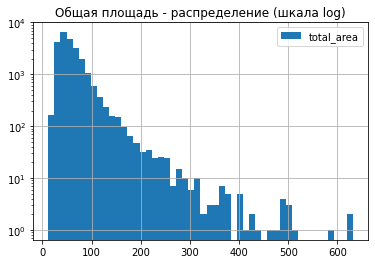

In [129]:
# гистограмма для общей площади объектов недвижимости, ось ординат - логарифмическая
df['total_area'].hist(bins=50, log=True, legend=True)
plt.title('Общая площадь - распределение (шкала log)') 

Text(0.5, 1.0, 'Общая площадь - район максимума значений (шкала log)')

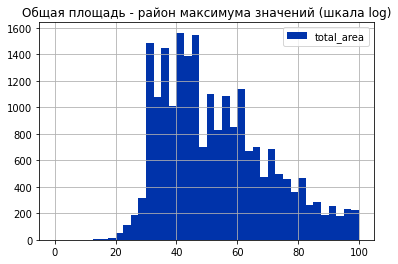

In [130]:
# укрупним гистограмму в районе максимума распределения:
df['total_area'].hist(bins=40, range=(0, 100), color='#0033AA', legend=True)
plt.title('Общая площадь - район максимума значений (шкала log)') 

Text(0.5, 1.0, 'Цена - распределение (шкала log)')

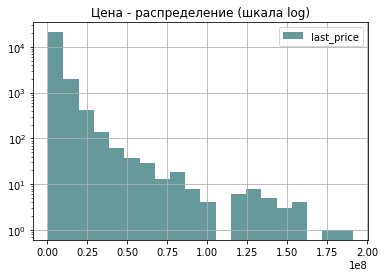

In [131]:
# гистограмма для цены объектов недвижимости, ось ординат - логарифмическая
df['last_price'].hist(bins=20, log=True, color='#669999', legend=True)
plt.title('Цена - распределение (шкала log)') 

Text(0.5, 1.0, 'Цена - область максимума (шкала log)')

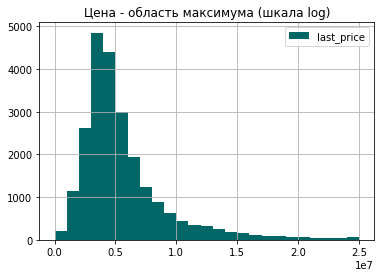

In [132]:
# снова увеличим область максимума:
df['last_price'].hist(bins=25, range=(0, 0.25e8), color='#006666', legend=True)
plt.title('Цена - область максимума (шкала log)') 

Text(0.5, 1.0, 'Количество комнат - распределение (шкала log)')

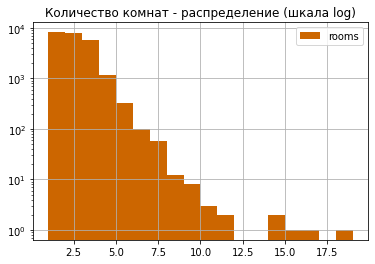

In [133]:
# гистограмма для количества комнат, ось ординат - логарифмическая
df['rooms'].hist(bins=18, log=True, color='#CC6600', legend=True)
plt.title('Количество комнат - распределение (шкала log)') 

Text(0.5, 1.0, 'Высота потолков - распределение (шкала log)')

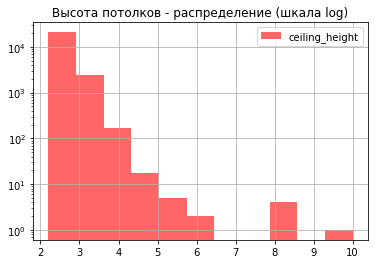

In [134]:
# гистограмма для высоты потолков, ось ординат - логарифмическая
df['ceiling_height'].hist(bins=11, log=True, color='#FF6666', legend=True)
plt.title('Высота потолков - распределение (шкала log)') 

Виден один явный отрыв в 10 метров, мы выводили эту строку при работе с пропусками со [столбцом `ceiling_height`](#ceiling_na)

In [135]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe().T

,count,mean,std,min,25%,50%,75%,max
total_area,23664.0,6.022866e+01,3.468142e+01,12.0,40.0,52.00,69.825,631.2
last_price,23664.0,6.414693e+06,7.899297e+06,560000.0,3425000.0,4650000.00,6800000.000,190870000.0
rooms,23664.0,2.078220e+00,1.062558e+00,1.0,1.0,2.00,3.000,19.0
ceiling_height,23664.0,2.698215e+00,2.356465e-01,2.2,2.6,2.65,2.700,10.0


Данные в столбцах `total_area`, `last_price`, `rooms` и `ceiling_height` выглядят равномерно распределенными, распределение напоминает распределение Пуассона во всех случаях (функция распределения вероятности Пуассона при  значении параметра математического ожидания случайной величины равной единице).

**Выводы:**
* большинство объектов имеют площадь от 30 до 62 кв. метров, меньше объектов площадью от 250 кв. метров;
* наибольшее число квартир имеют стоимость от 2 до 6 млн. руб., редкость — квартиры стоимостью более 40 млн. руб.
* самые популярные квартиры - одно, двух и трехкомнатные.
* высота потолков в большинстве квартир — от 2.6 до 2.7 м. Квартиры с потолками более 3.5 метров встречаются намного реже.

### 5.2 Время продажи квартиры<a name="sience_2"></a>
Изучим время продажи квартиры. Это столбец `days_exposition`.

Выведем основную информацию о распределении и построим гистограмму:

In [136]:
df['days_exposition'].describe()

count    23664.000000
mean       156.649003
std        213.599673
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

Text(0.5, 1.0, 'Время продажи квартиры')

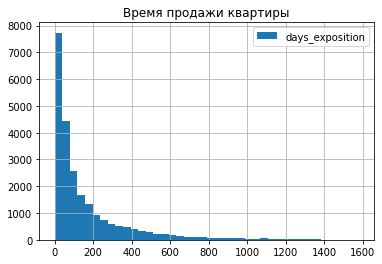

In [137]:
df['days_exposition'].hist(bins=40, legend=True)
plt.title('Время продажи квартиры') 

Распределение равномерное, но есть завал в области нулевых значений - их очень много. 

Большое количество нулевых значений образовалось на этапе работы с пропусками - все пропуски мы заменили на нули (предполжительно, пропуски означают или техническую ошибку, или то, что объявление находится ещё на этапе продажи). Поскольку уточнить причину пропусков нельзя, эти значения мы приравняли к нулю дней. Также есть слишком большие значения - есть объявления, которые висят больше 4 лет. Это может помешать исследованию.<br>
Построим диаграмму размаха, чтобы посмотреть на выбросы:

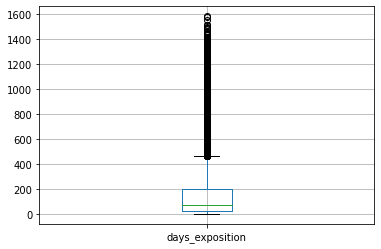

In [138]:
df.boxplot(column='days_exposition')
plt.show()

Изменим масштаб, чтобы посмотреть грамницы нашего межквартильного интервала по-ближе:

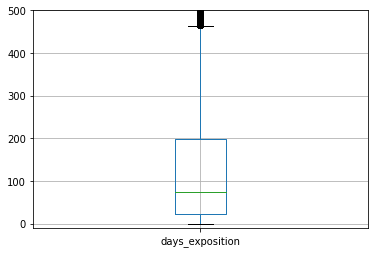

In [139]:
df.boxplot(column='days_exposition')
plt.ylim(-10, 500)
plt.show()

Когда мы работали с пропусками в столбце `ceiling_height`, писали [функцию](#low_border) для поиска нижней границы диаграммы размаха `low_border(Series)`. Напишем функцию для поиска верхней границы:

In [140]:
# функция для поиска верхней границы диаграммы размаха, принимающая на вход объект Series
def high_border(Series):
    return (Series.quantile(0.75) + 1.5 * (Series.quantile(0.75) - Series.quantile(0.25)))

In [141]:
high_border(df['days_exposition'])

464.5

Среднее арифметическое время продажи - 157 дней, при этом медианное - 74 дня.<br>
Поскольку нижний ус диаграммы размаха упирается в минимум (равен ему), верхний - 464 дня.

Будем считать, что слишком долгая продажа - более 500 дней. Посмотрим, сколько объявлений продаются мгновенно, а сколько - более 500 дней:

In [142]:
print(f'''Продается мгновенно: {df.query('days_exposition == 0')['days_exposition'].count()}
Продается дольше 500 дней: {df.query('days_exposition > 500')['days_exposition'].count()}''')

Продается мгновенно: 3178
Продается дольше 500 дней: 1747


Разберемся с быстрыми продажами. Нулевых значений явно больше 10% (3181 из 23699), это очень много, чтобы принебречь этими данными. Очень похоже на техническую ошибку (объявление было выставлено и тут же снято с публикации).

Посмотрим, сколько объявлений было выставлено менее 22 дней (это первый квартиль), но больше нуля:

In [143]:
df.query('0 < days_exposition < 22')['days_exposition'].count()

2629

Купля-продажа недвижимости - дело не одного дня. Покупателю нужно связаться с продавцом или риелтором, встретиться, осмотреть объект недвижимости, как правило оставить задаток для оформления документов. Сделать это всё меньше чем за сутки до снятия объявления с публикации - практически нереально. При этом от 1 до 22 дней висело на сайте меньше объявлений, чем в течении суток. Тут явно что-то не так.

In [144]:
# посмотрим 10 случайных объявлений, которые были сняты меньше чем за день
df.query('days_exposition == 0').sample(10) 

,airports_nearest,balcony,ceiling_height,city_centers_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,last_price,living_area,locality_name,open_plan,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,rooms,studio,total_area,total_images,meter_price,weekday_exp,month_exp,year_exp,floor_category,living_total_ratio,kitchen_total_ratio
3089,35620.0,0,2.64,9913.0,0,2019-04-22,3,12,False,8.0,8000000.0,44.0,Санкт-Петербург,False,1,91.0,1,819.0,3,False,68.0,18,117647,Понедельник,4,2019,Другой,0.647059,0.117647
19401,14435.0,0,2.60,16984.0,0,2019-04-12,2,5,False,6.0,3990000.0,30.8,Санкт-Петербург,False,0,NaN,1,285.0,2,False,46.9,8,85075,Пятница,4,2019,Другой,0.656716,0.127932
22336,18838.0,4,3.20,3506.0,0,2019-04-05,5,6,False,16.5,9999000.0,55.5,Санкт-Петербург,False,0,NaN,3,511.0,2,False,92.4,19,108214,Пятница,4,2019,Другой,0.600649,0.178571
21532,10590.0,0,2.50,13966.0,0,2019-03-14,8,14,False,14.0,10500000.0,49.0,Санкт-Петербург,False,0,NaN,0,NaN,3,False,86.0,11,122093,Четверг,3,2019,Другой,0.569767,0.162791
11142,24897.0,1,3.63,5185.0,0,2018-07-04,3,4,False,27.0,17300000.0,98.0,Санкт-Петербург,False,2,437.0,0,NaN,5,False,152.0,20,113816,Среда,7,2018,Другой,0.644737,0.177632
9428,26392.0,1,3.00,5094.0,0,2016-03-19,3,6,False,27.0,15500000.0,51.0,Санкт-Петербург,False,2,671.0,1,882.0,3,False,99.5,20,155779,Суббота,3,2016,Другой,0.512563,0.271357
15606,43427.0,2,2.80,15930.0,0,2019-04-05,13,14,False,NaN,3499000.0,17.0,Санкт-Петербург,False,1,529.0,0,NaN,1,True,25.0,4,139960,Пятница,4,2019,Другой,0.680000,NaN
8855,23435.0,2,2.65,14739.0,0,2019-02-10,4,14,False,10.4,4650000.0,21.6,Санкт-Петербург,False,0,NaN,0,NaN,1,False,42.0,9,110714,Воскресенье,2,2019,Другой,0.514286,0.247619
13312,14448.0,0,3.20,8136.0,0,2019-04-11,5,7,False,8.0,18300000.0,81.7,Санкт-Петербург,False,0,NaN,0,NaN,4,False,121.0,15,151240,Четверг,4,2019,Другой,0.675207,0.066116
10938,17790.0,0,2.70,16177.0,0,2019-04-02,6,9,False,6.0,5300000.0,27.4,Санкт-Петербург,False,1,586.0,0,NaN,2,False,44.7,11,118568,Вторник,4,2019,Другой,0.612975,0.134228


При этом, никаких общих закономерностей, которые могли бы помочь выявить причину появления такого количества нулей в `days_exposition` - не заметно.

Text(0.5, 1.0, 'Время продажи - до 20 дней')

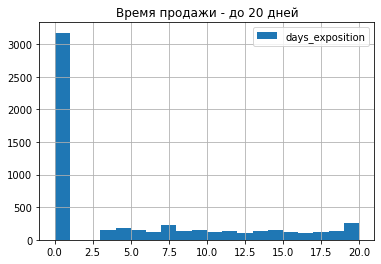

In [145]:
# Посмотрим на распределение в пределах 20 дней продаж:
df['days_exposition'].hist(bins=20, range=(0,20), legend=True)
plt.title('Время продажи - до 20 дней') 

На распределении в пределах 20 дней видно, что количество объявлений, которые были сняты быстрее 3 дней, но больше 0 - совершенно нет.

Будем считать быстрыми продажами все продажи быстрее 10 дней (две рабочие недели). После 10 дней распределение немного идет на спад:

Text(0.5, 1.0, 'Время продажи - от 2 до 20 дней')

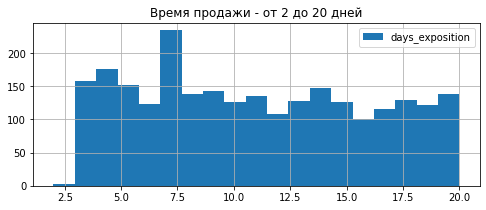

In [146]:
df['days_exposition'].hist(bins=19, range=(2,20), figsize=(8, 3), legend=True)
plt.title('Время продажи - от 2 до 20 дней') 

Перейдем к верхней границе нашего распределения, то есть к объявлениям, которые висят более 500 дней: 

Text(0.5, 1.0, 'Время продажи - распределение')

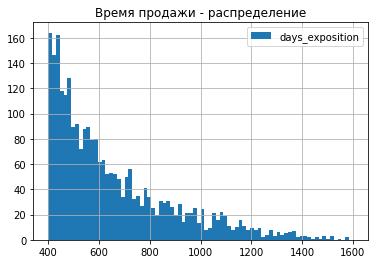

In [147]:
df['days_exposition'].hist(bins=80, range=(400,1600), legend=True)
plt.title('Время продажи - распределение') 

В районе 500 дней - падение количества объявлений ниже 100. Оставим эту границу.

В главе работы с пропусками данных мы заменили все пропущенные значения `days_exposition` нулями. Тогда мы предположили, что пропущенные значения возможно означают, что объявление было выставлено и тут же снято, провисев на сайте меньше суток. Возможно, пропущенные значения `days_exposition` означают, что объявление еще активно и не снято с публикации. Тут бы уточнить у заказчика.

Чтобы не потерять важные данные, учтем те объявления, в которых после заполнения пропусков `days_exposition` равно нулю. Быструю продажу будем считать не 10, а 5 дней (одна рабочая неделя). Верннюю границу также расширим до 600 дней (чуть больше полутора лет), чтобы потерять не более 10%:

In [148]:
# подсчет, сколько процентов данных мы потеряем, отбросив все значения days_exposition (0, 5] и [600, max]  
(1 - len(df.query('days_exposition == 0 or 5 < days_exposition < 600')) / len(df)) * 100

7.14164976335362

Сформируем новый датафрейм, в который войдут значения без редких и выбивающихся по столбцу `days_exposition`:

In [149]:
# создаем датафрейм без выделяющихся значений
df_new = df.query('days_exposition == 0 or 5 < days_exposition < 600') 

len(df_new) # считаем количество объявлений в новом датафрейме

21974

In [150]:
df['days_exposition'].describe() # полные данные по столбцу с количеством дней размещения объявления до снятия

count    23664.000000
mean       156.649003
std        213.599673
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [151]:
# посмотрим, как изменились характеристики распределения количества дней продажи
df_new['days_exposition'].describe()

count    21974.000000
mean       122.027578
std        136.202795
min          0.000000
25%         23.000000
50%         69.000000
75%        174.000000
max        599.000000
Name: days_exposition, dtype: float64

Среднее арифметическое и стандартное отклонение уменьшилось, медиана тоже. Остальные характеристики изменились предсказуемо ожиданиям.

Заменим старый датафрейм новым и удалим новый:

In [152]:
df = df_new
del df_new

Посмотрим на распределение количества дней в новом датафрейме:

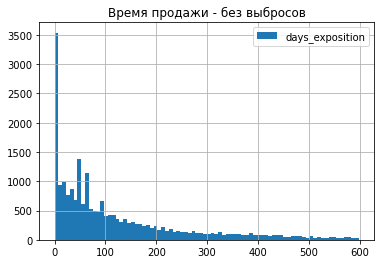

In [153]:
df['days_exposition'].hist(bins=80, legend=True)
plt.title('Время продажи - без выбросов') 
None

Есть явно выделяющиеся 4 значения по количеству дней: близкое к нулю, два в районе 50-70 дней и ещё один в районе 90 (на ноль не обращаем внимания - это заполненные пропущенные значения).<br>
Изменим длину оси абсцисс наблюдения:

Text(0.5, 1.0, 'Время продажи - от 20 до 100 дней')

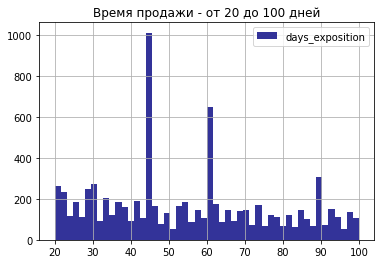

In [154]:
df['days_exposition'].hist(bins=50, range=(20, 100), legend=True, color='#333399')
plt.title('Время продажи - от 20 до 100 дней') 

**Выводы:** 
* Среднее время продажи квартиры - 118 дней, медианное - 92;
* 45, 61 и 90 дней - полтора два и три месяца - столько дней продавалось больше всего объектов недвижимости (исключая сверхбыстрые продажи);
* очень быстрые продажи - до 10 дней;
* медленные - более 500 дней.

### 5.3 Факторы, влияющие на стоимость квартиры<a name="sience_3"></a>
Исследуем, какие факторы больше всего влияют на стоимость квартиры.

Ответим на следующие вопросы:
* зависит ли цена от площади, числа комнат, удалённости от центра;
* зависят ли цены от того, на каком этаже расположена квартира: первом, последнем или другом;
* зависит ли цена от даты размещения: дня недели, месяца и года.


#### Зависимость цены от площади, числа комнат, удаленности от центра

Будем работать с новым датафреймом, в котором нет выбивающихся значений по количеству дней размещения - это наиболее репрезентативная выборка.

Построим матрицу рассеивания для столбцов цены - `last_price`, общей площади - `total_area`, количества комнат -`rooms` и удаленности от цента - `city_centers_nearest`:

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='city_centers_nearest', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='city_centers_nearest', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='city_centers_nearest', ylabel='rooms'>],
       [<AxesSubplot:xlabel='last_price', ylabel='city_centers_nearest'>,
        <AxesSubplot:xlabel='total_area', ylabel='city_centers_nearest'>,
        <AxesSubplot:xlabel='rooms', ylabel='city_centers_nearest'>,
        <AxesSubp

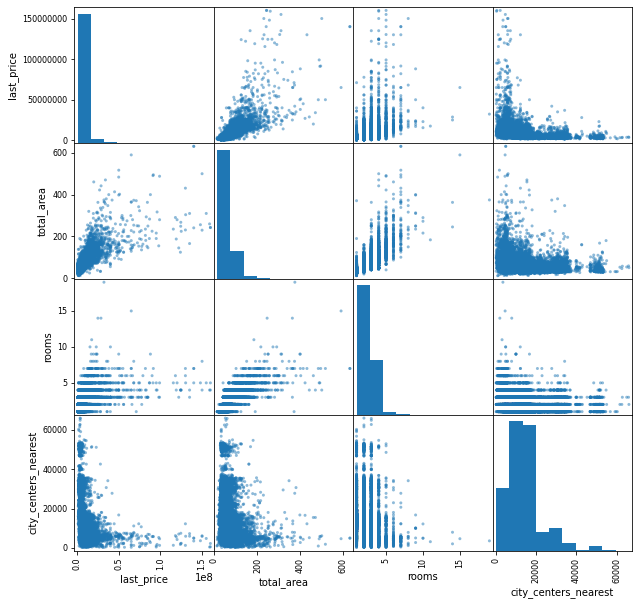

In [155]:
pd.plotting.scatter_matrix(df[['last_price', 'total_area', 'rooms', 'city_centers_nearest']], figsize=(10, 10)) 

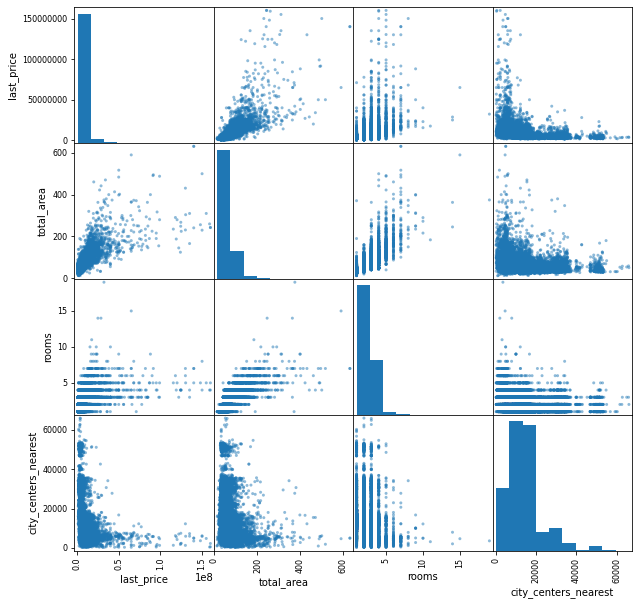

In [156]:
# Код ревьюера

pd.plotting.scatter_matrix(df[['last_price', 'total_area', 'rooms', 'city_centers_nearest']], figsize=(10, 10)) 
None

Дополним матрицу рассеивания таблицей коэффициентов корреляции, после чего опишем результат:

In [157]:
df[['last_price', 'total_area', 'rooms', 'city_centers_nearest']].corr()

,last_price,total_area,rooms,city_centers_nearest
last_price,1.000000,0.741572,0.440900,-0.268309
total_area,0.741572,1.000000,0.767548,-0.228698
rooms,0.440900,0.767548,1.000000,-0.182528
city_centers_nearest,-0.268309,-0.228698,-0.182528,1.000000


In [158]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe().T

,count,mean,std,min,25%,50%,75%,max
total_area,21974.0,5.976071e+01,3.399608e+01,12.0,40.0,52.00,69.0,631.2
last_price,21974.0,6.320753e+06,7.598450e+06,560000.0,3400000.0,4600000.00,6700000.0,160000000.0
rooms,21974.0,2.067989e+00,1.051195e+00,1.0,1.0,2.00,3.0,19.0
ceiling_height,21974.0,2.695594e+00,2.333428e-01,2.2,2.6,2.65,2.7,10.0


Построим диаграмму рассеивания для `total_area` и `last_price` с линией "тренда" (регрессионной прямой):

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

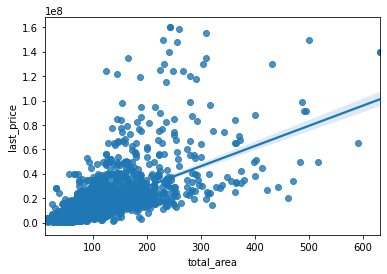

In [159]:
# строим отдельно диаграмму рассеивания для 'total_area' и 'last_price'
sps.regplot(x='total_area', y='last_price', data=df)

Построим график зависимости цены `last_price` от медианных значений количества комнат `rooms`:

<AxesSubplot:title={'center':'Зависимость цены от количества комнат'}, xlabel='rooms'>

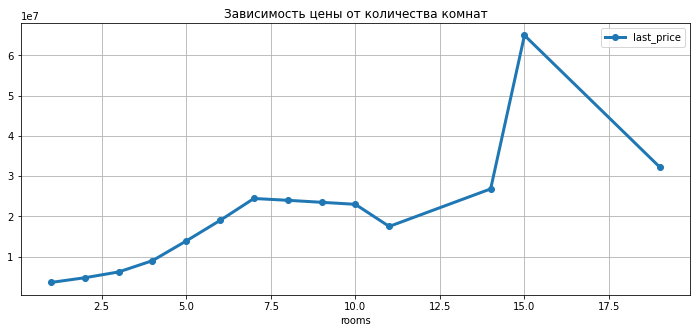

In [160]:
# создаем сводную таблицу с медианными значениями цены, группируя по количеству комнаты. Строим по ней график.
df.pivot_table(
    index='rooms', 
    values='last_price', 
    aggfunc='median') \
  .plot(grid=True, figsize=(12, 5), marker='o', linewidth=3, title='Зависимость цены от количества комнат')

<AxesSubplot:title={'center':'Зависимость цены от удаленности от центра'}, xlabel='city_centers_nearest', ylabel='last_price'>

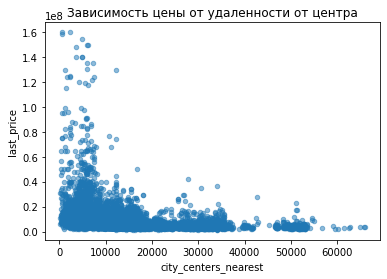

In [161]:
df.plot(x='city_centers_nearest', y='last_price', kind='scatter', title='Зависимость цены от удаленности от центра', alpha=0.5)

Теперь посмотрим, как зависит цена от категории этажа. Сделаем сводную таблицу, где в качестве строк будут категории, а значениями будут медианные значения цены. Построим график:

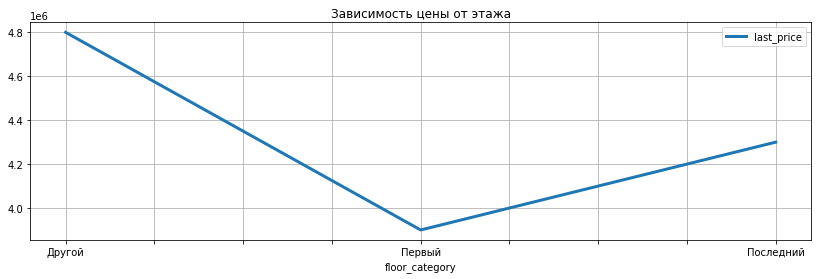

In [162]:
# Опишем функцию построения графика по медианным значениям из сводной таблицы
def pivot_plot_median(df, index, values, title):
    df.pivot_table(
        index=index,
        values=values,
        aggfunc='median') \
      .plot(grid=True, figsize=(14, 4), linewidth=3, title=title)

# построим график зависимости менданного значения цены от этажа
pivot_plot_median(df, index='floor_category', values='last_price', title='Зависимость цены от этажа')

Посмотрим, как зависит размещение объявления от дня недели, месяца и года:

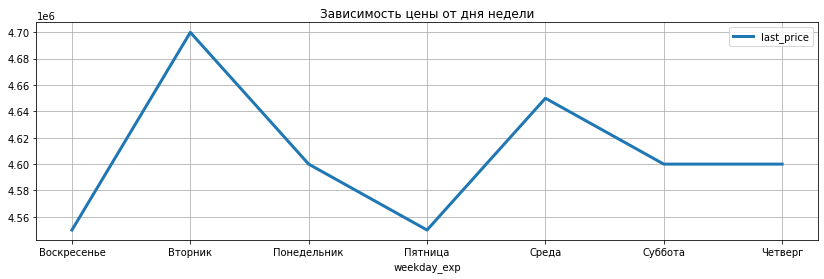

In [163]:
# построим график зависимости менданного значения цены от дня недели
pivot_plot_median(df, index='weekday_exp', values='last_price', title='Зависимость цены от дня недели')

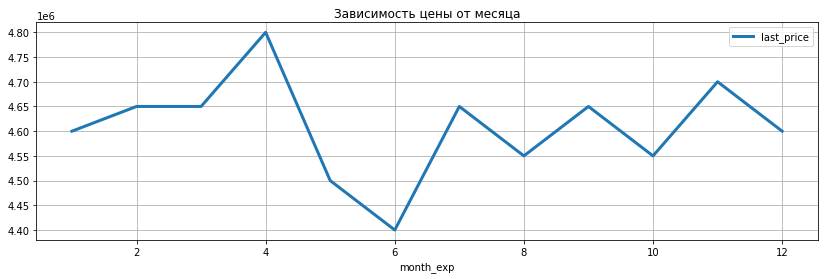

In [164]:
# построим график зависимости менданного значения цены от месяца
pivot_plot_median(df, index='month_exp', values='last_price', title='Зависимость цены от месяца')

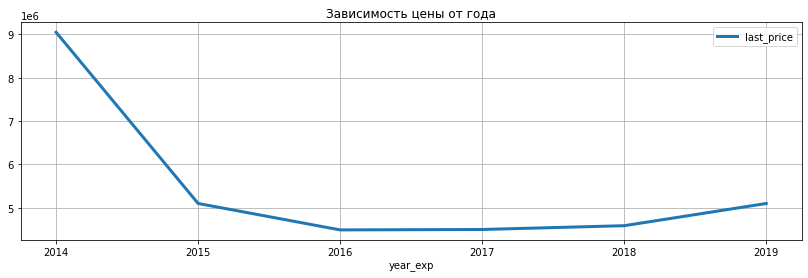

In [165]:
# построим график зависимости менданного значения цены от год
pivot_plot_median(df, index='year_exp', values='last_price', title='Зависимость цены от года')

**Выводы:**
1. Цена зависит от площади - чем больше площадь объекта недвижимости, тем выше цена.
2. Цена слабо зависит от количества комнат. Она растет с увеличением количества комнат до 10, затем перестает расти (отдельные всплески и дорогие 13-15 комнатные объекты обусловлены ценой на недвижимость выше на 1 порядок).
3. Цена зависит от удаленности от центра. Да, коэффициент корреляции около нуля, но самые дорогие объекты недвижимости продаются ближе всего к центру, это видно из гистограммы. Просто таких дорогих объявлений немного относительно остальных, медианные значения цены распределены равномерно относительно расстояния от центра города, поэтому коэффициент Пирсона около нуля (-0.18).
4. Цена зависит от этажа - наиболее низкой стоимостью обладают квартиры, расположенные на первом этаже. Объекты на последнем этаже дороже, чем на первом, в среднем на 500 000 руб. Дороже всего квартиры на других этажах. Это закономерно: на последнем иногда протекает (а летом нагревается) крыша, в случае неработающего лифта подниматься выше всего; на первом - выше вероятность затопления и больше воздействие окружающей среды с улицы.
5. Дешевле всего стоит недвижимость, размещенная в пятницу и воскресенье, по месяцам: дешевле всего недвижимость, размещенная в июне, дороже всего - в апреле и в III и IV кварталах.
6. По годам - самая дорогая недвижимость была с 2014 по 2016 год и с 2018 по 2019 (весь исследуемый диапазон - от 2014 до 2019). Самые низкие цены на недвижимость были в период с 2016 по 2018 год. Понижение цен с 2016 по 2018 объясняется стабилизацией экономики после экономического кризиса конца 2014 года, стабилизацией курса рубля, ростом цен на нефть, снижением ключевой ставки рефинансирования ЦБ. Дальнейшее повышение цен с 2018 года связано с ростом инфляции, падением цен на нефть, ростом курса валют.

### 5.4 - 10 населенных пунктов с наибольшим числом объявлений<a name="sience_4"></a>

* Выберем 10 населённых пунктов с наибольшим числом объявлений.<br> 
* Посчитаем среднюю цену квадратного метра в этих населённых пунктах. 
* Выделим населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`

In [166]:
# группируем фрейм по населенному пункту, выбираем цену за квадратный метр, агрегируем количество (объявлений)
# и среднее значение, сортируем по количеству выводим топ 10, из этого тома сортируем по среднему значению цены за кв. метр по убыванию
city_top10 = df.groupby('locality_name')['meter_price'] \
               .agg(['count', 'mean']) \
               .sort_values(by='count', ascending=False) \
               .head(10) \
               .sort_values(by='mean', ascending=False) 
city_top10

,count,mean
locality_name,,
Санкт-Петербург,14535,114064.097489
Пушкин,340,102617.379412
деревня Кудрово,269,92571.245353
посёлок Парголово,310,89958.303226
посёлок Мурино,487,85835.772074
посёлок Шушары,419,78724.675418
Колпино,319,75281.736677
Гатчина,281,68967.807829
Всеволожск,370,68827.054054


Подкрепим столбчатой диаграммой:

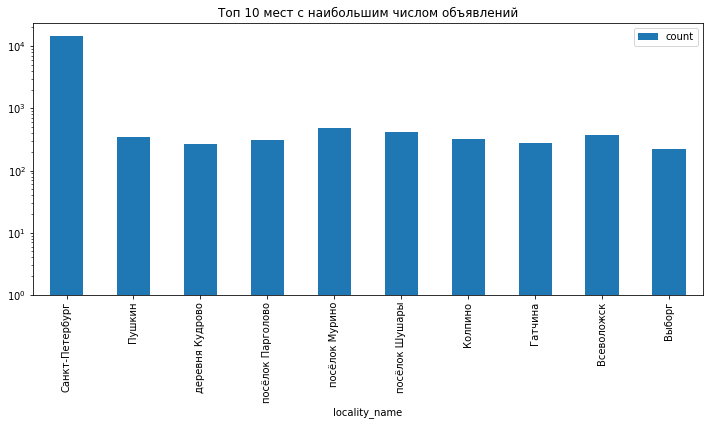

In [167]:
city_top10.plot(kind='bar', 
                y='count', 
                log=True, 
                figsize=(12, 5), 
                title='Топ 10 мест с наибольшим числом объявлений'
               )
None

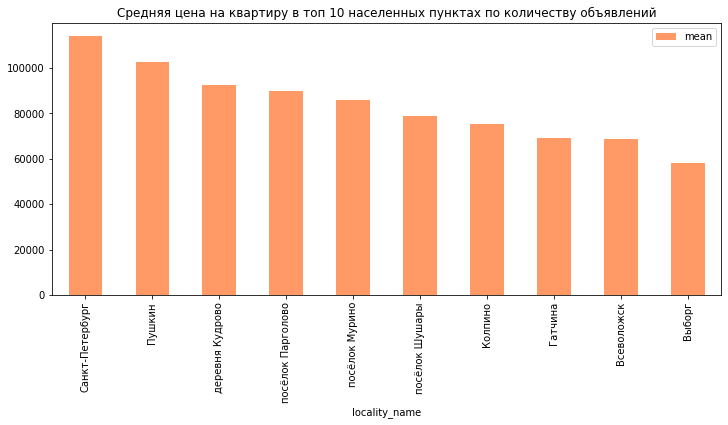

In [168]:
city_top10.plot(kind='bar', 
                y='mean', 
                figsize=(12, 5), 
                title='Средняя цена на квартиру в топ 10 населенных пунктах по количеству объявлений',
                color='#FF9966'
               )
None

**Выводы:**
* наибольшее число объявлений в Санкт-Петербурге, наименьшее - в Выборге. Это закономерно - Санкт-Петербург самы населенный город в Ленобласти.
* средняя цена за квадратный метр больше всего в северной столице - Санкт-Петербурге, меньше всего также в Выборге, этот город находится на севере области, близко к финской границе, с 2014 года налюдается естественная убыль населения в Выборге (поле завершения работ по запуску газопровода "Северный поток-1"). 

### 5.5 Центр Санкт-Петербурга<a name="sience_5"></a>

Изучиv предложения квартир: для каждой квартиры есть информация о расстоянии до центра. 
1. Выделим квартиры в Санкт-Петербурге. Наша задача — выяснить, какая область входит в центр.
2. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. 
3. Посчитаем среднюю цену для каждого километра. 
4. Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется, — это и будет центральная зона.

<AxesSubplot:title={'center':'Зависимость цены от удаленности от центра'}, xlabel='center_nearest_km'>

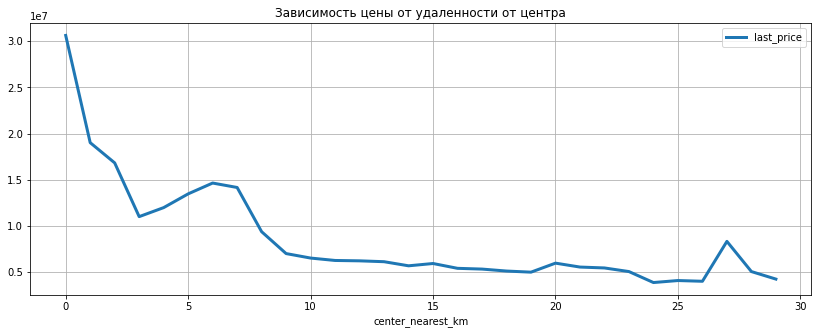

In [169]:
# 2 - создадим столбец с расстоянием до центра в километрах - `center_nearest_km`
df['center_nearest_km'] = round(df['city_centers_nearest'] / 1000)

# 1 - выделим квартиры в Санкт-Петергубре в отдельную переменную для удобства. Поскольку df_spb является выборкой, а не отдельным фреймом,
#  добавить в него столбец нельзя
df_spb = df.query('locality_name == "Санкт-Петербург"')

# 3 - создадим сводную таблицу, сгруппировав все значения цены по расстоянию в км, применив к значениям расчет среднего
# 4 - посроим график зависимости цены от удаленности от центра

df_spb.pivot_table(
    index='center_nearest_km',
    values='last_price',
    aggfunc='mean') \
  .plot(grid=True, figsize=(14, 5), linewidth=3, title='Зависимость цены от удаленности от центра')


**Выводы:**
* цена падает от 0 до 3 км от центра, затем растет до 6-7км, а потом плавно снижается, имея локальный всплеск в районе 27км от центра.<br>

Взглянув на карту Санкт-Петербурга (примерив виртуальную линейку) становится очевидным, что:

* центр города ограничен 3км (нулевой километр - Дворцовая площадь, от него на юг до Обводного канала - 3км, на восток до Красногвардейского района, разделенного от Центрального Невой - 3км, на запад - часть Василеостровского района, на север - большая часть Петроградского района).
* цена от 3 од 6 км растет, скорее всего из-за того, что радиус наблюдения начинает пересекать набережные с красивыми видами и Крестовский остров, где находится элитная недвижимость.
* дальше цена падает экспоненциально, что соответствует распределению Пуассона.

Таким образом, определим центр до той границы, где график начинает плавное снижение - **7км.**

### Анализ квартир в Центре<a name="sience_6"></a>

Выделим сегмент квартир в центре.<br>
Проанализируему эту территорию и изучим следующие параметры: 
* площадь, 
* цена, 
* число комнат, 
* высота потолков. 

Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). <br>
Сделаем выводы, отличаются ли они от общих выводов по всей базе.

Сначала выделим квартиры в центре Санкт-Петербурга (мы определили, что это квартиры в радиусе 3км):

In [170]:
df_spb = df.query('locality_name == "Санкт-Петербург" and center_nearest_km <= 7')

Построим гистограмму для следующих столбцов основного датафрейма `df`: `total_area`, `last_price`, `rooms`, `ceiling_height`:

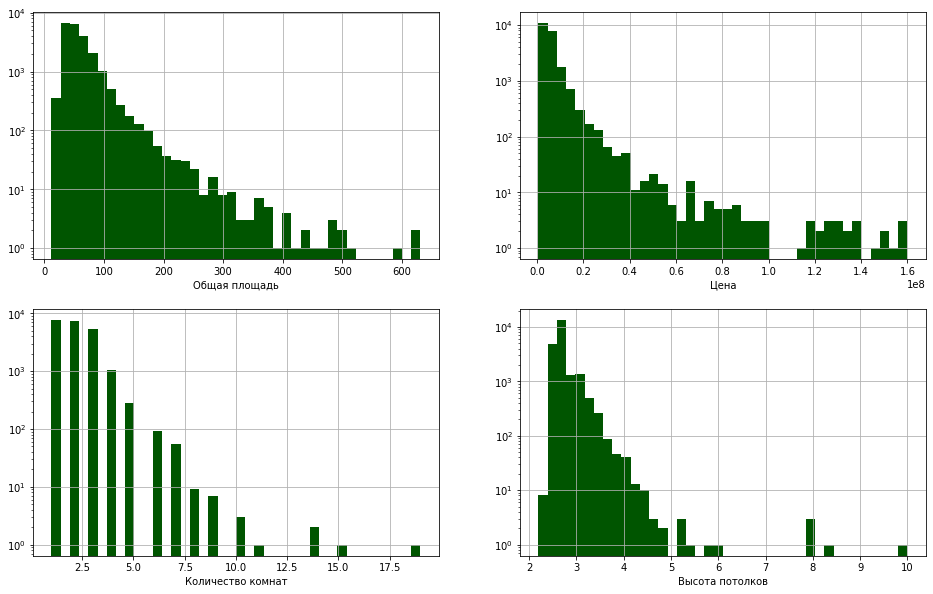

In [171]:
# объявляем функцию, которая построит сразу 4 графика на общих осях, с включенной логарифмической шкалой.
def combo_plt(df, columns, columns_title, hist_color):
    fig, axes = plt.subplots(2, 2, figsize=(16,10)) # задаем фигуры и оси в пространстве 2х2
    
    axe = axes.ravel() # оси абсцисс сводятся в одну
    # для каждой пары номер столбца-имя столбца строится гистограмма c количеством корзин 40 в логарифмической шкале
    for i, column in enumerate(columns):
        df[column].hist(ax=axe[i], bins=40, color=hist_color, log=True).set_xlabel(columns_title[i])
# именуем заголовки гистограмм
columns_title = ['Общая площадь', 'Цена', 'Количество комнат', 'Высота потолков'] 

# строим распределения исследуемых показателей по датафрейму df
combo_plt(df, ['total_area', 'last_price', 'rooms', 'ceiling_height'], columns_title, '#005500')


In [172]:
# выводим основные характеритики распределений и транспонируем по ним
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe().T 

,count,mean,std,min,25%,50%,75%,max
total_area,21974.0,5.976071e+01,3.399608e+01,12.0,40.0,52.00,69.0,631.2
last_price,21974.0,6.320753e+06,7.598450e+06,560000.0,3400000.0,4600000.00,6700000.0,160000000.0
rooms,21974.0,2.067989e+00,1.051195e+00,1.0,1.0,2.00,3.0,19.0
ceiling_height,21974.0,2.695594e+00,2.333428e-01,2.2,2.6,2.65,2.7,10.0


Теперь выведем гистограмму для тех же столбцов нового датафрейма `df_spb`:

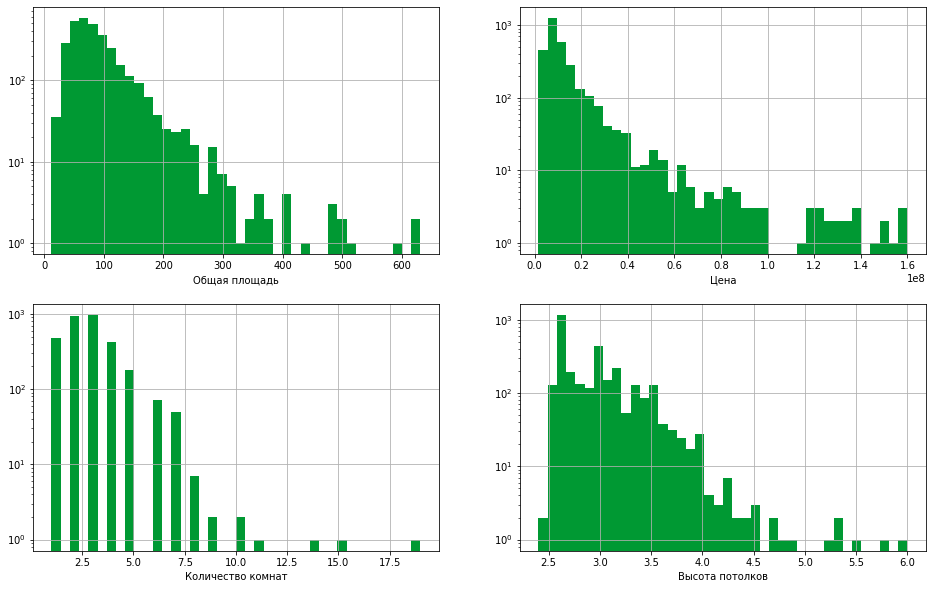

In [173]:
combo_plt(df_spb, ['total_area', 'last_price', 'rooms', 'ceiling_height'], columns_title, '#009933')

In [174]:
# выводим основные характеритики распределений в виде массива и транспонируем по ним новый 
df_spb[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe().T 

,count,mean,std,min,25%,50%,75%,max
total_area,3124.0,9.139769e+01,5.678066e+01,12.0,56.00,78.0,1.084250e+02,631.2
last_price,3124.0,1.391596e+07,1.611706e+07,1686000.0,6600000.00,9000000.0,1.424250e+07,160000000.0
rooms,3124.0,2.811460e+00,1.413755e+00,1.0,2.00,3.0,3.000000e+00,19.0
ceiling_height,3124.0,2.934017e+00,3.697202e-01,2.4,2.65,2.8,3.120000e+00,6.0


**Выводы:**
* площадь квартир в центре больше (медиана - 78 кв.м. в центре против 50 всех квартир);
* цена квартир в центре выше (медиана 9млн в центре против 4.5млн всех квартир), это плохо видно на гистограмме, но хорошо заметно при подсчете медиан распределения цен каждого датафрейма;
* в центре больше двух и трех, и четырехкомнатных квартир, тогда как в целом в выборке много одно и двухкомнатных квартир;
* медианная высота потолков в центре больше (около 3м), чем в целом (2,65м).

Выделим факторы, влияющие на стоимость квартиры. Для этого построим матрицу распределения значений `rooms`, `floor`, `center_nearest_km`, `first_day_exposition`:

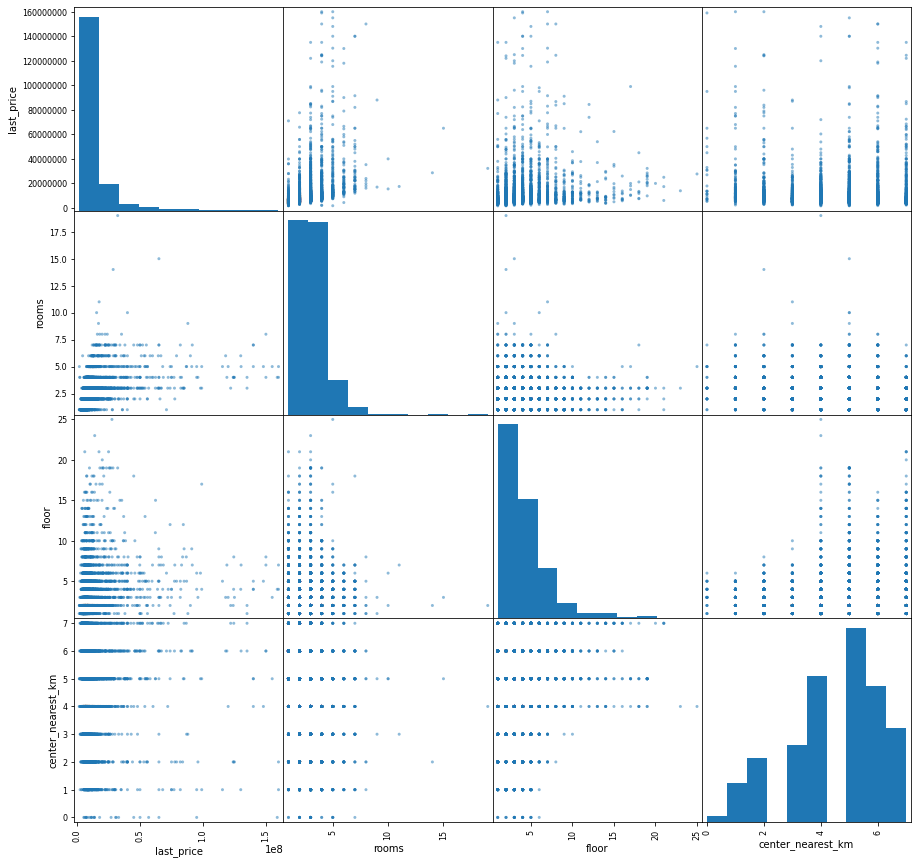

In [175]:
pd.plotting.scatter_matrix(df_spb[['last_price', 'rooms', 'floor','center_nearest_km']], figsize=(15, 15)) 
None

In [176]:
# построим матрицу коэффициентов корреляции
df_spb[['last_price', 'rooms', 'floor','center_nearest_km', 'first_day_exposition']].corr()

,last_price,rooms,floor,center_nearest_km
last_price,1.000000,0.388772,0.116918,-0.046831
rooms,0.388772,1.000000,-0.050763,-0.159060
floor,0.116918,-0.050763,1.000000,0.237381
center_nearest_km,-0.046831,-0.159060,0.237381,1.000000


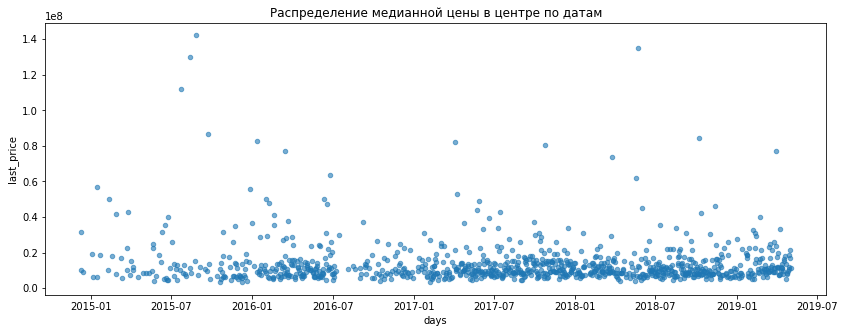

In [177]:
#pivot_plot_median(df_spb, index='first_day_exposition', values='last_price', title='Распределение медианной цены по датам')
df_spb_pivot = df_spb.pivot_table(
    index='first_day_exposition',
    values='last_price',
    aggfunc='mean')
df_spb_pivot['days'] = df_spb_pivot.index
df_spb_pivot.plot(kind='scatter', x='days', y='last_price', figsize=(14, 5), alpha=.6, 
                  title='Распределение медианной цены в центре по датам')
None

Август-октябрь 2015 года и июль 2018 - месяцы с самыми высокой медианной ценой на недвижимость в центре.

Сравним, как меняется категория этажа, дней недели, месяцев и годов размещения объявлений в центре:

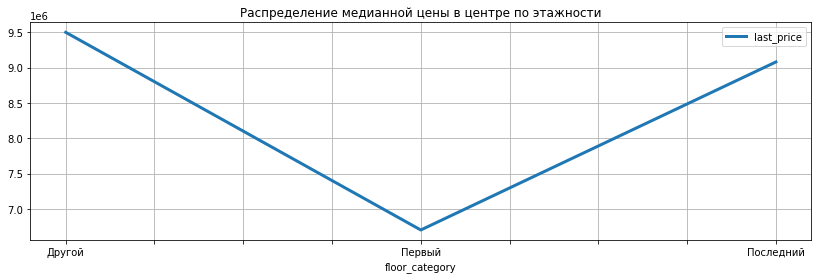

In [178]:
pivot_plot_median(df_spb, index='floor_category', values='last_price', 
                  title='Распределение медианной цены в центре по этажности')

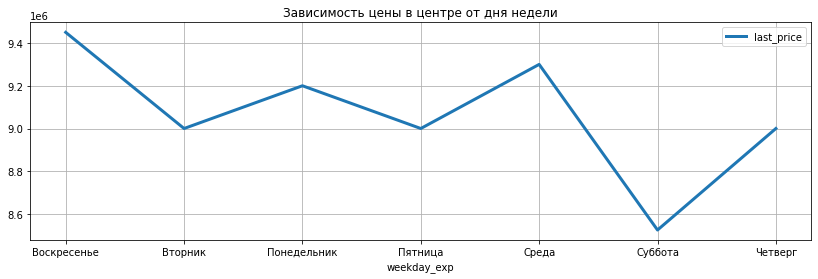

In [179]:
pivot_plot_median(df_spb, index='weekday_exp', values='last_price', 
                  title='Зависимость цены в центре от дня недели')

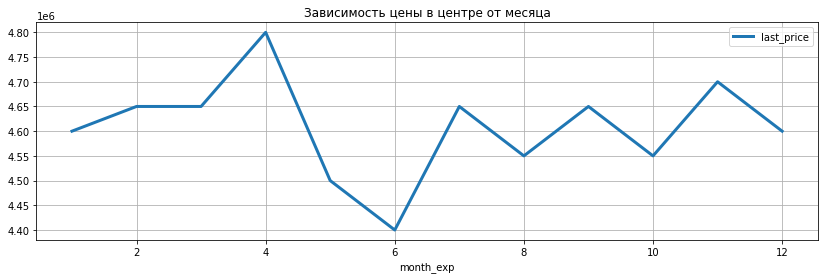

In [180]:
pivot_plot_median(df, index='month_exp', values='last_price', 
                  title='Зависимость цены в центре от месяца')

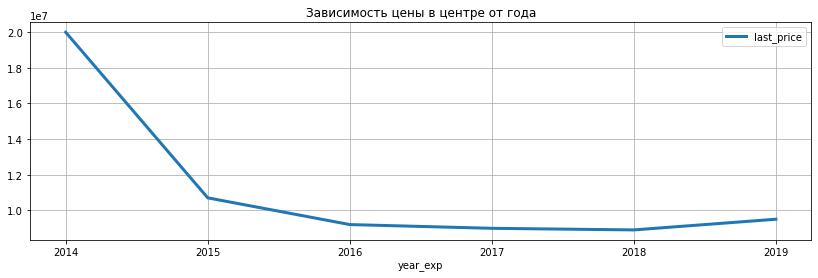

In [181]:
pivot_plot_median(df_spb, index='year_exp', values='last_price', 
                  title='Зависимость цены в центре от года')

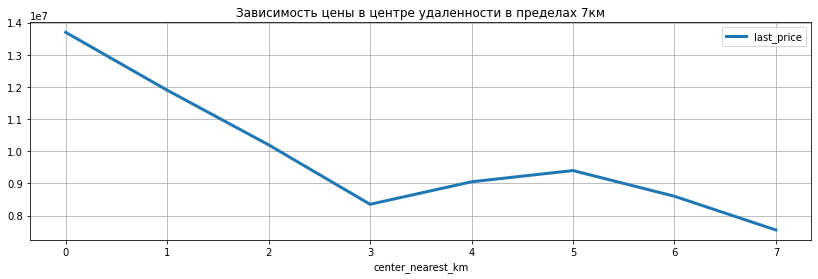

In [182]:
pivot_plot_median(df_spb, index='center_nearest_km', values='last_price', 
                  title='Зависимость цены в центре удаленности в пределах 7км')

**Выводы:**
* на цену квартиры в центре влияет количество комнат - цена растет от 1 до 5 комнат, затем падает (больше 6 комнат мало квартир, скорее всего, это коммунальные квартиры);
* самая высокая цена на квартиры в центре - на 3-7 этажах;
* чем ближе к центре, тем дороже, в радиусе 1 км самая дорогая недвижимость;
* по категории этажа квартиры в центре также дешевле на первом этаже, затем на последнем и потом на остальных. Но медианная цена квартиры на первом этаже сильно ниже, чем на последнем - разница больше 2,5млн;
* по годам и месяцам продажи квартир медианная цена распределяется в центре также, как и в целом по базе;
* по дням недели квартиры в центре с самой низкой медианной ценой размещались в субботу, с самой высокой - в воскресенье (в целом по базе самая низкая - в пятницу, самая высокая - во вторник);
* в целом, на цену квартир в центре влияют те же факторы, что и на квартиры в центре, за исключением расстояния - ближе 3км от центра цены сильно растут.

## 6. Общий вывод<a name="resume"></a>

Мы провели анализ рыночной стоимости недвижимости на основании данных Яндекс Недвижимости за период с 2015 по середину 2019 года.<br>

Работа проходила в несколько этапов.

1. В ходе предобработки данных мы заполнили (где это было возможно) медианными значениями пропущенные данные о расстоянии до аэропорта, высоте потолка, количества парков и водоемов в радиусе 3км. Пропущенные значения населенных пунктов, площади кухни мы заполнили, найдя объекты недвижимости, максимально похожие по значениям других столбцов. Пропущенные значения о количестве дней, которое было размещено объявление от публикации до снятия, а также пропущенные значения о количестве балконов мы заполнили нулями. Незаполненную этажность дома мы заполнили максимальным значением этажа квартиры в каждом объявлении.

Все столбцы, где это возможно, мы привели к нужным типам данных (количество дней размещения, дата размещения, количество балконов, этажность, общая цена), избавились от аномалий (высокие потолки и количество комнат равное нулю). Дубликатов не обнаружили.

2. На следующем этапе добавили в таблицу:
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

3. В ходе исследования мы ответили на множество вопросов и сделали выводы:

* большинство объектов имеют площадь от 30 до 62 кв. стоимостью от 2 до 6 млн. руб., в основном это одно, двух и трехкомнатные квартиры с высотой потолков — от 2.6 до 2.7 м;
* среднее время продажи квартиры - 118 дней, медианное - 92, самые быстрые продажи были до 5 дней, медленные - более 600;
* цена на квартиру зависит от площади, количества комнат, удаленности от центра (чем ближе, тем дороже) и этажа - самые дешевые на первом этаже, затем на последнем, затем на всех остальных;
* дешевле всего стоила недвижимость, размещенная в воскресенье в июне в I и II кварталах, по годам - самая низкие цены были с 2016 по 2018 год;
* наибольшее число объявлений в Санкт-Петербурге, наименьшее - в Выборге. Это же верно и для средней стоимости квадратного метра;

по Санкт-Петербургу:
* площадь квартир, высота потолков, количество комнат и цена в центре больше, чем во любых других районах города и области:

|        Характеристика       | Центр Санкт-Петербурга  | Всего по базе |
|:--------------------------- |:-----------------------:| :------------:|
| Площадь квартир, кв. м      |            78           |        52     |
| Высота потолков, м          |            2.9          |        2.6    |
| Цена, млн                   |            9            |        4.6    |

* на цену квартиры в центре влияет количество комнат (больше всего самых дорогих - 5 комнатных), этаж (3-5);
* ближе 3км к центру самая дорогая недвижимость;
* самые дорогие квартиры в центре выставлялись на продажу в августе-октябре 2015 года и в июле 2018;
* по годам и месяцам продажи квартир медианная цена распределяется в центре также, как и в целом по базе;
* по дням недели квартиры в центре с самой низкой медианной ценой размещались в субботу, с самой высокой - в воскресенье (в целом по базе самая низкая - в пятницу, самая высокая - во вторник);
* в целом, на цену квартир в центре влияют те же факторы, что и на квартиры в центре, за исключением расстояния - ближе 3км от центра цены сильно растут (в среднем от 8 до 14 млн).